## Import Relevant packages



In [1]:
!pip install xgboost==2.0.3
!pip install lightgbm
!pip install optuna
!pip install art==6.1

# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import scipy.stats as ss
import optuna

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from art import text2art
from termcolor import colored

import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from math import radians, sin, cos, sqrt, atan2

  Using cached xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl (297.1 MB)
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
  Using cached lightgbm-4.3.0-py3-none-manylinux_2_28_x86_64.whl (3.1 MB)
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
  Using cached optuna-3.6.1-py3-none-any.whl (380 kB)
  Using cached alembic-1.13.1-py3-none-any.whl (233 kB)
  Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)
  Using cached packaging-24.0-py3-none-any.whl (53 kB)
  Using cached colorlog-6.8.2-py3-none-any.whl (11 kB)


## Import of Dataset



In [ ]:
foodData = pd.read_csv('FoodDeliveryData.csv')
foodData

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


#### This dataset has 20 columns.

#### **Categorical Data:**

Weatherconditions \- Weather condition during delivery \(e.g Sunny, Stormy\)

Road\_traffic\_density \- Road density condition during delivery \(e.g Low, Medium\)

Vehicle\_condition \- Condition of delivery vehicle \(0\-bad, 2\- very good\)

Type\_of\_order \- Order type \(e.g: Buffet, Snack\)

Type\_of\_vehicle \- Delivery vehicle type \(e.g: motorcycle, scooter\)

multiple\_deliveries \- Is delivery person delivering multiple deliveries in a single trip? \(e.g 0 \- only handling that specific delivery order, 1 \- one or more delivery order to deliver before/after\)

Festival \- Is delivery day a festival day?

City \- Delivery location \(e.g: Metropolitian/ Urban\)

#### **Numerical Data:**

Delivery\_person\_Age \- Age of delivery person

ID \- Row ID

Delivery\_person\_ID \- Delivery person ID

Delivery\_person\_Ratings \- Ratings of the delivery person

Restaurant\_latitude \- restaurant location latitude

Restaurant\_longitude \- restaurant location longitude

Delivery\_location\_latitude \- delivery location latitude

Delivery\_location\_longitude \- delivery location longitude

Order\_Date \- date of the order placed by customer

Time\_Orderd \- time customer placed the delivery order

Time\_Order\_picked \- time delivery person picked up the delivery order

Time\_taken\(min\) \- time taken for the successful delivery in minutes



In [ ]:
foodData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [ ]:
foodData.shape

(45593, 20)

In [ ]:
foodData.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [ ]:
# Create a new data frame with only the ID column
ID_data = foodData[['ID']]
unique_ids_count = ID_data['ID'].nunique()
print("Number of unique IDs:", unique_ids_count)

Number of unique IDs: 45593


This show that all the rows in our dataset is unique and no duplicate rows.


## Data Cleaning & Preparation



Remove Null Value in the dataset



In [ ]:
#Convert String 'NaN' to np.nan
def convert_nan(df):
    foodData.replace('NaN', float(np.nan), regex=True,inplace=True)

convert_nan(foodData)

In [ ]:
#Check null values
foodData.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weatherconditions               616
Road_traffic_density            601
Festival                        228
ID                                0
Type_of_vehicle                   0
Type_of_order                     0
Vehicle_condition                 0
Time_Order_picked                 0
Delivery_person_ID                0
Order_Date                        0
Delivery_location_longitude       0
Delivery_location_latitude        0
Restaurant_longitude              0
Restaurant_latitude               0
Time_taken(min)                   0
dtype: int64

In [ ]:
# Drop rows with null values
foodData.dropna(inplace=True)
foodData.shape

(41368, 20)

Null value that has been dropped = 45593 \- 41368 = 4225 data

We decided to dropped the 4225 data as these may affect the accuracy of any machine learning models we will use to predict the time duration for delivery.


After dropping Null Value, we make some process to the data to make it looks nicer and make it more easier to understand and also ease our analysis process. Firstly we copy the dataset into a new cleaned dataset so that we won't modify the original dataset. Also, we drop some columns which are unnecessary to our analysis such as ID as delivery person ID is already there.

1. Remove \(min\) from time taken column
2. Remove (conditions) from weather conditions column
3. Change jam to very high in road\_traffic\_density
4. Remove column named 'ID' as it is not needed for subsequent used.



In [ ]:
cleaned_Data = foodData.copy() #so that we don't edit the original data
cleaned_Data['Time_taken(min)'] = cleaned_Data['Time_taken(min)'].str.replace(r'\(.*?\) ?', '', regex=True).str.strip() #remove min from time_taken
cleaned_Data['Weatherconditions'] = cleaned_Data['Weatherconditions'].str.replace('conditions', '') #remove the word condition in the values in weaether_conditions
cleaned_Data['Road_traffic_density'] = cleaned_Data['Road_traffic_density'].str.replace(r'\bJam\b', 'Very High', regex=True) #Change jam to very high
cleaned_Data.drop(['ID'], axis=1, inplace=True) #remove the useless columns
cleaned_Data

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Very High,2,Snack,scooter,1,No,Metropolitian,33
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32
45589,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,Windy,Very High,0,Buffet,motorcycle,1,No,Metropolitian,36
45590,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16
45591,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26


Also, we change time taken, delivery person age and delivery person ratings from strings to integer to ensure that our data analysis can be done correctly

In [ ]:
# changing strings to int 
# 1. Time_taken(min)
cleaned_Data['Time_taken(min)'] = cleaned_Data['Time_taken(min)'].astype(int) # changing into type int
# 2. Delivery_person_Age
cleaned_Data['Delivery_person_Age'] = cleaned_Data['Delivery_person_Age'].astype(int) # changing into type int
# 3. Delivery_person_Ratings 
cleaned_Data['Delivery_person_Ratings'] = cleaned_Data['Delivery_person_Ratings'].astype(float) # changing into type int

cleaned_Data

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Very High,2,Snack,scooter,1,No,Metropolitian,33
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32
45589,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,Windy,Very High,0,Buffet,motorcycle,1,No,Metropolitian,36
45590,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16
45591,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26


Next, we introduce distance from restaurant and destination longitudinal and latitudinal in KM so that we can perform analysis from distance.

In [ ]:
cleaned_Data[cleaned_Data['Restaurant_latitude']<0][['Restaurant_latitude','Restaurant_longitude']]

,Restaurant_latitude,Restaurant_longitude
92,-27.163303,78.057044
283,-27.165108,78.015053
1091,-15.546594,73.760431
1783,-23.230791,77.437020
1976,-22.539129,88.365507
...,...,...
43860,-15.498603,73.826911
44051,-15.157944,73.950889
44640,-9.982834,76.283268
44933,-19.874733,75.353942


If we checked these values into a geological calculator. it would be somewhere in the middle of the ocean which is wrong. Hence, there might be error where the latitude should be positives. Thus, we change the latitude to positive as atfer changing it to positive it is a valid location.


In [ ]:
cleaned_Data['Restaurant_latitude']=cleaned_Data['Restaurant_latitude'].abs()

In [ ]:
#Calculate distance between restaurant location & delivery location
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = 6371 * c  # Radius of the Earth in kilometers
    return distance

cleaned_Data['Distance_between_restaurant_and_delivery_place(KM)'] = cleaned_Data.apply(lambda row: round(haversine_distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude'])), axis=1)
cleaned_Data

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance_between_restaurant_and_delivery_place(KM)
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24,3
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Very High,2,Snack,scooter,1,No,Metropolitian,33,20
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,2
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,8
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32,1
45589,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,Windy,Very High,0,Buffet,motorcycle,1,No,Metropolitian,36,11
45590,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16,5
45591,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26,6


After introducing distance using the longitude and latitude, we choose to drop these variables as they will no longer be used to predict time taken for delivery.

In [ ]:
cleaned_Data.drop(['Delivery_person_ID', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Order_Date','multiple_deliveries'], axis=1, inplace=True)
cleaned_Data

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Festival,City,Time_taken(min),Distance_between_restaurant_and_delivery_place(KM)
0,37,4.9,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,No,Urban,24,3
1,34,4.5,19:45:00,19:50:00,Stormy,Very High,2,Snack,scooter,No,Metropolitian,33,20
2,23,4.4,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,No,Urban,26,2
3,38,4.7,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,No,Metropolitian,21,8
4,32,4.6,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,No,Metropolitian,30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,No,Metropolitian,32,1
45589,21,4.6,19:55:00,20:10:00,Windy,Very High,0,Buffet,motorcycle,No,Metropolitian,36,11
45590,30,4.9,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,No,Metropolitian,16,5
45591,20,4.7,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,No,Metropolitian,26,6


# Exploratory Data Analysis

We'll now take a look at the time taken for delivery which we will be predicting.
### Box\-plot and histogram for amount of time taken

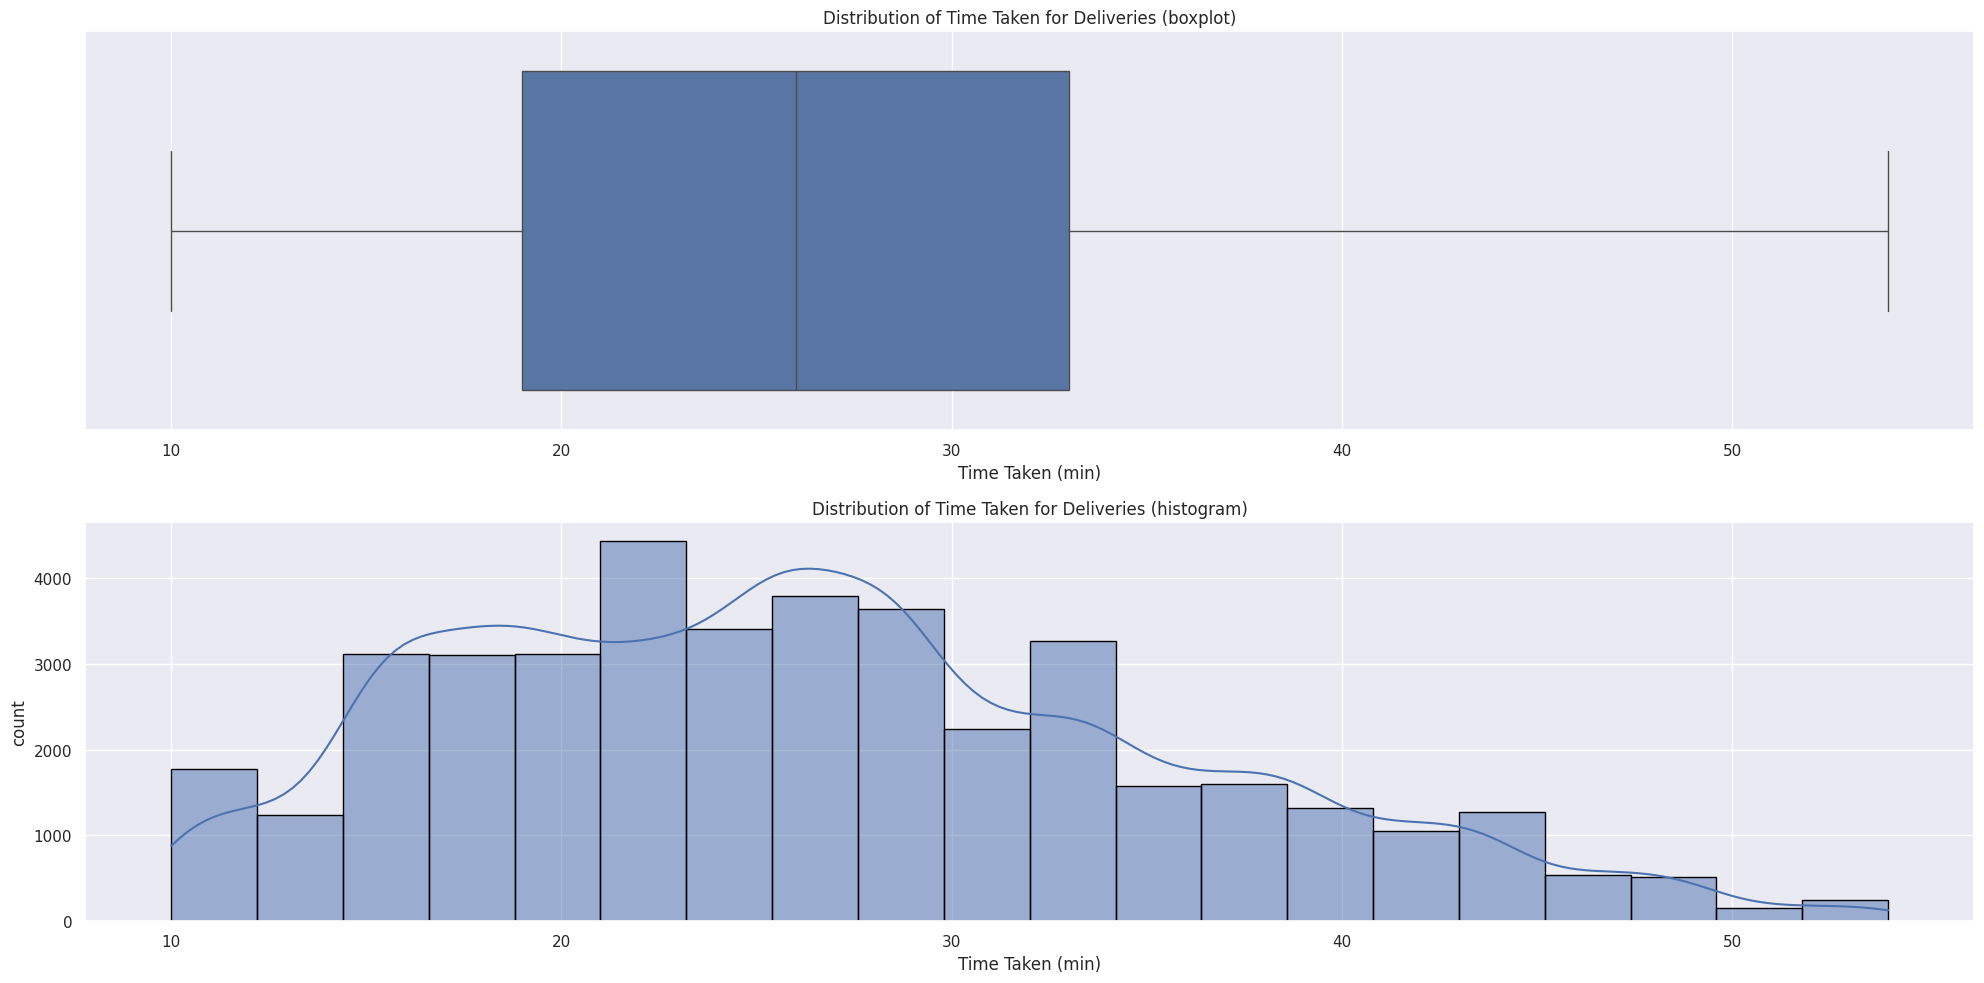

In [ ]:
# Amount of the Time Taken
fig, ax = plt.subplots(2, 1, figsize=(20, 10))

# Boxplot
sb.boxplot(data = cleaned_Data['Time_taken(min)'], orient = "h", ax=ax[0])
ax[0].set_title('Distribution of Time Taken for Deliveries (boxplot)')
ax[0].set_xlabel('Time Taken (min)')

# Histogram
sb.histplot(cleaned_Data['Time_taken(min)'], bins=20, edgecolor='black', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Time Taken for Deliveries (histogram)')
ax[1].set_xlabel('Time Taken (min)')
ax[1].set_ylabel('count')

plt.tight_layout()
plt.show()

As observed from the box plot, there are no outliers in our data, indicating that the time taken values fall within a relatively consistent range without any extreme values. Therefore, there is no need to remove any outliers.

Additionally, the histogram reveals that the range of time taken is from 10 to 54 minutes, allowing us to visualize the frequency of time taken within different intervals. This provides insights into the central tendency and variability of delivery time. Such information may be useful for understanding typical delivery times, identifying potential bottlenecks or inefficiencies in the delivery process, and making informed decisions to optimize delivery operations.

From the dataset, we can see that there are some predictors that correspond to the delivery person, environment, order, and logistical. Below is the grouping of each variable into one of the four categories.

Delivery Person:
- Delivery_person_Age
- Delivery_person_Ratings

Environment:
- Weatherconditions
- Road_traffic_density
- City
- Festival

Order Variables:
- Time_Ordered
- Time_Order_picked
- Type_of_order

Logistical Variables:
- Vehicle_condition
- Type_of_vehicle
- Distance_between_restaurant_and_delivery_place(KM)


We will look at each of these predictors in more detail one by one by analyzing them.



### Predictors corresponding to the Delivery Person



#### Delivery person age

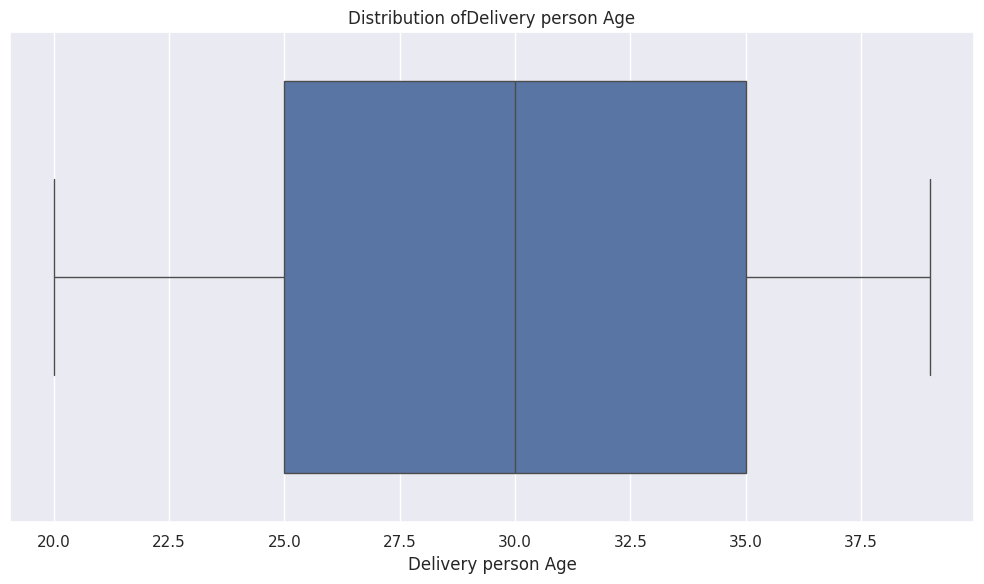

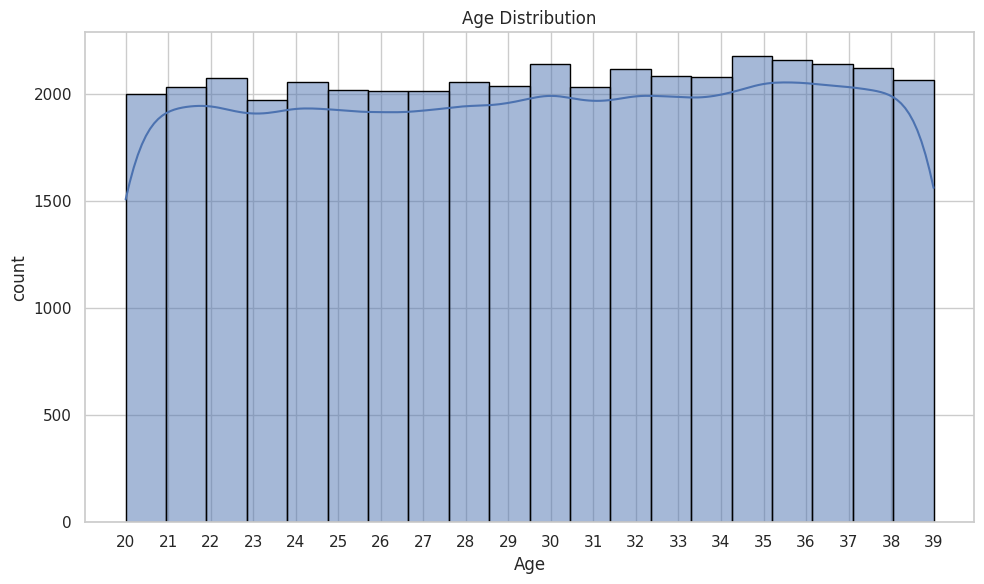

In [ ]:
# Age of the Delivery Person
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Boxplot
sb.boxplot(data = cleaned_Data['Delivery_person_Age'], orient = "h")
plt.title('Distribution ofDelivery person Age')
plt.xlabel('Delivery person Age')
plt.tight_layout()
plt.show()

# Histogram
sb.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ages_with_counts = cleaned_Data['Delivery_person_Age'][cleaned_Data['Delivery_person_Age'].notnull()]
sb.histplot(ages_with_counts, bins=20, kde=True, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.xticks(ages_with_counts.unique())
plt.tight_layout()
plt.show()

In [ ]:
# Compute median, Q1, and Q3
median = cleaned_Data['Delivery_person_Age'].median()
Q1 = cleaned_Data['Delivery_person_Age'].quantile(0.25)
Q3 = cleaned_Data['Delivery_person_Age'].quantile(0.75)
min_value = cleaned_Data['Delivery_person_Age'].min()
max_value = cleaned_Data['Delivery_person_Age'].max()

print("Delivery_person_Age:")
print("Median:", median)
print("Minimum value:", min_value)
print("Maximum value:", max_value)
print("Q1 (First Quartile):", Q1)
print("Q3 (Third Quartile):", Q3)

Delivery_person_Age:
Median: 30.0
Minimum value: 20
Maximum value: 39
Q1 (First Quartile): 25.0
Q3 (Third Quartile): 35.0


From the box plot, it is evident that there are no outliers in delivery person age, indicating that there are no unusually high or low age values, and the ages of delivery persons fall within the range of 20 to 39. This suggests that most of the delivery persons are relatively young.

#### Delivery person ratings

<AxesSubplot: xlabel='Delivery_person_Ratings', ylabel='Count'>

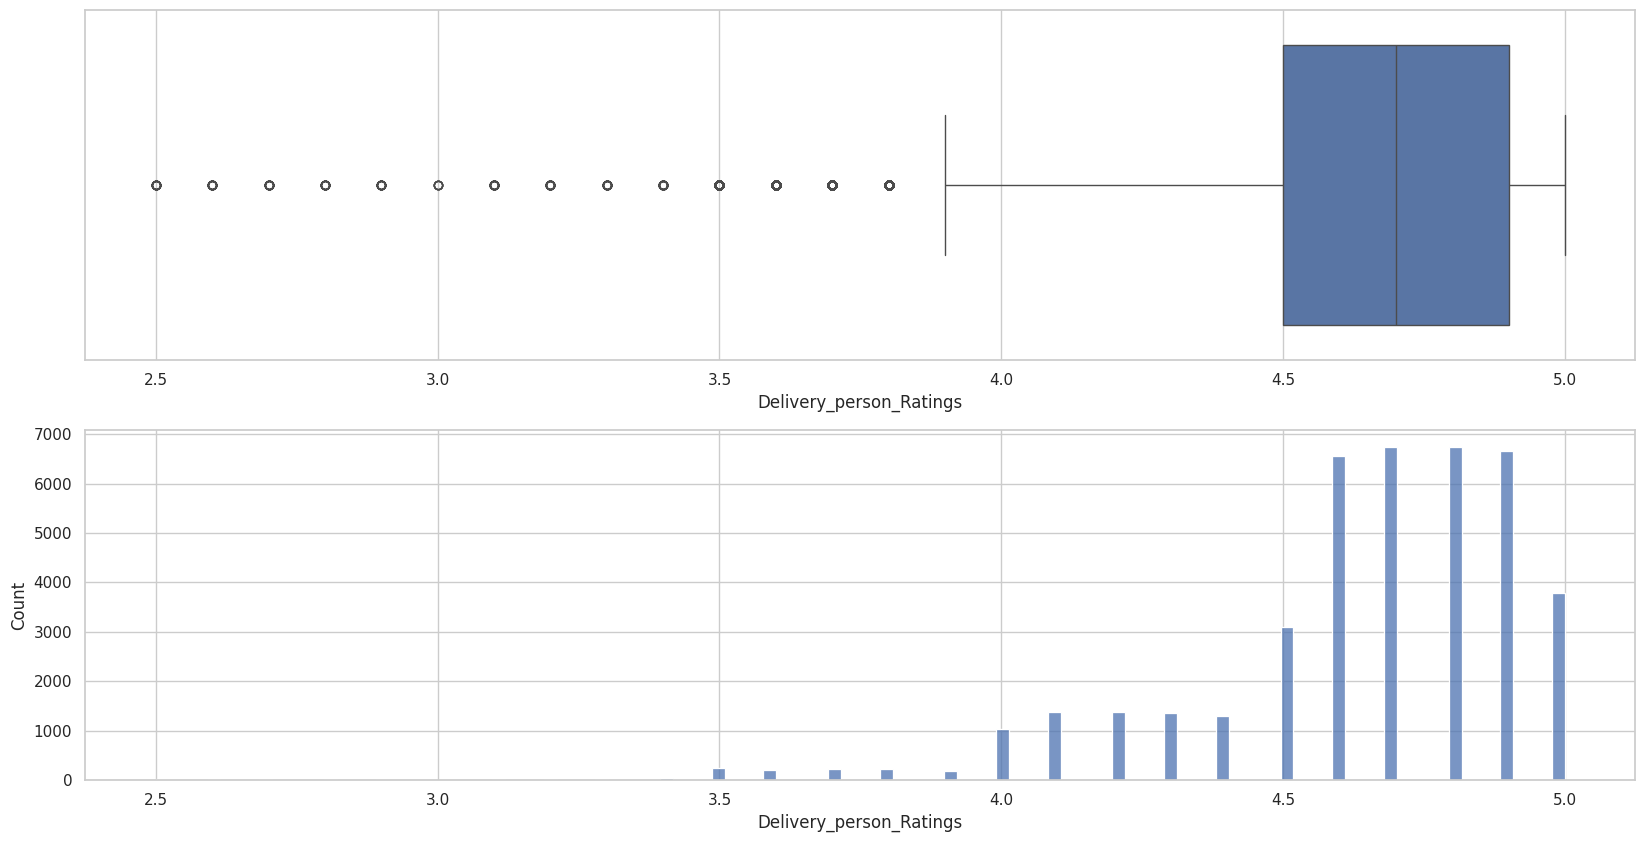

In [ ]:
# Ratings of delivery driver
f, axes = plt.subplots(2, 1, figsize=(20, 10))
sb.boxplot(data = cleaned_Data['Delivery_person_Ratings'], orient = "h", ax = axes[0])
sb.histplot(data = cleaned_Data['Delivery_person_Ratings'].sort_values(), ax = axes[1])

In [ ]:
# Compute median, Q1, and Q3
median = cleaned_Data['Delivery_person_Ratings'].median()
Q1 = cleaned_Data['Delivery_person_Ratings'].quantile(0.25)
Q3 = cleaned_Data['Delivery_person_Ratings'].quantile(0.75)
min_value = cleaned_Data['Delivery_person_Ratings'].min()
max_value = cleaned_Data['Delivery_person_Ratings'].max()

print("Delivery_person_Ratings:")
print("Median:", median)
print("Minimum value:", min_value)
print("Maximum value:", max_value)
print("Q1 (First Quartile):", Q1)
print("Q3 (Third Quartile):", Q3)

Delivery_person_Ratings:
Median: 4.7
Minimum value: 2.5
Maximum value: 5.0
Q1 (First Quartile): 4.5
Q3 (Third Quartile): 4.9


We can observe that the average ratings of the delivery persons mostly range between 4.5 and 4.8, with occasional outliers indicating lower ratings, possibly due to slow delivery times. 

Understanding the distribution of delivery person ratings can provide insights into customer satisfaction levels and help identify areas for improvement in delivery service quality.

Furthermore, addressing any issues related to slow delivery times can be crucial for maintaining high customer ratings and enhancing overall customer experience.

## Predictors corresponding to the Environment



#### Weather Conditions

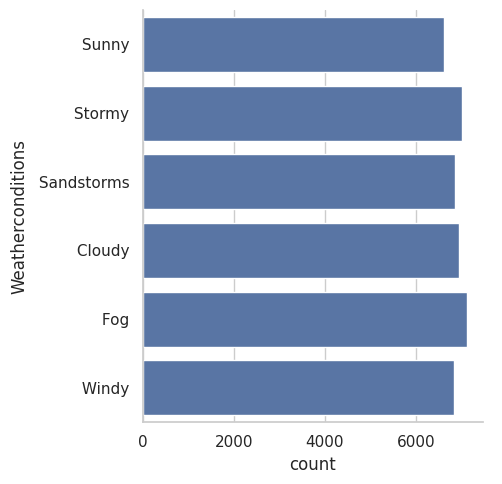

In [ ]:
# Environmental Conditions
sb.catplot(y = 'Weatherconditions', data = cleaned_Data, kind = "count")

The graph above illustrates a diverse range of weather conditions observed throughout the duration of our dataset. 

The occurrences of these different weather conditions appear to be fairly evenly distributed, indicating a balanced representation across the dataset. 

This variation in weather patterns may be attributed to local climatic trends, seasonal changes, and geographic location.

#### Road traffic density

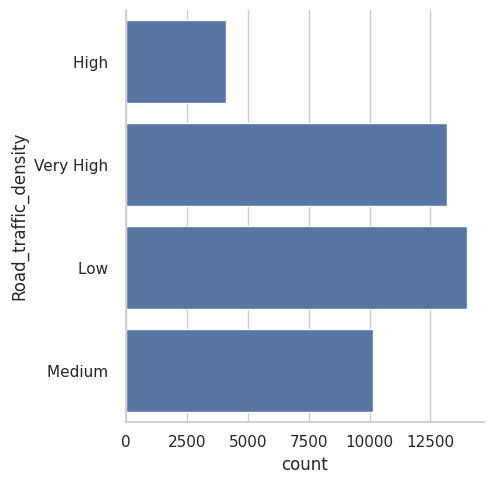

In [ ]:
# Environmental Conditions
sb.catplot(y = 'Road_traffic_density', data = cleaned_Data, kind = "count")

The graph reveals that the highest count corresponds to the lowest traffic density, followed by very high, medium, and low traffic densities. 

The presence of all four density levels indicates fluctuations in traffic conditions, which may be influenced by factors such as the day of the week, time of day, road infrastructure, population density, and any events or incidents affecting traffic flow. 

Additionally, the lower count for high road traffic density could be attributed to the similarity between high and very high densities, prompting delivery personnel to select 'very high' instead.

#### City

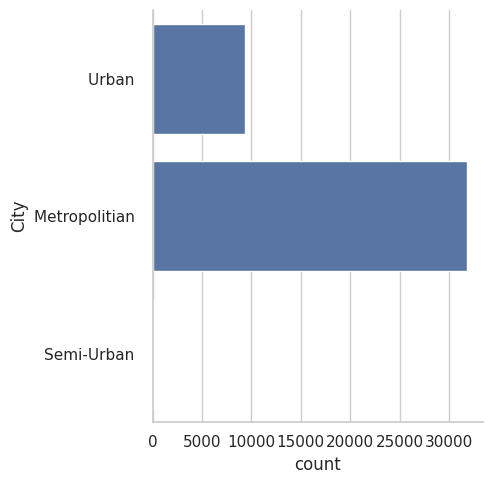

In [ ]:
# Environmental Conditions
sb.catplot(y = 'City', data = cleaned_Data, kind = "count") #Metropolitian Cities ordered most of the orders

Based on the graph above, metropolitan areas demonstrate the highest count, followed by urban and semi-urban areas. 

The high count in metropolitan areas could be attributed to their suitability for food delivery services, owing to their dense populations and large size.

Similarly, urban areas, despite having lower populations compared to metropolitan areas, still show a demand for food delivery services. 

This is might be because urban areas encompass both commercial and residential zones, catering to diverse lifestyles and culinary preferences, thereby creating a substantial market for food delivery.

#### Festival

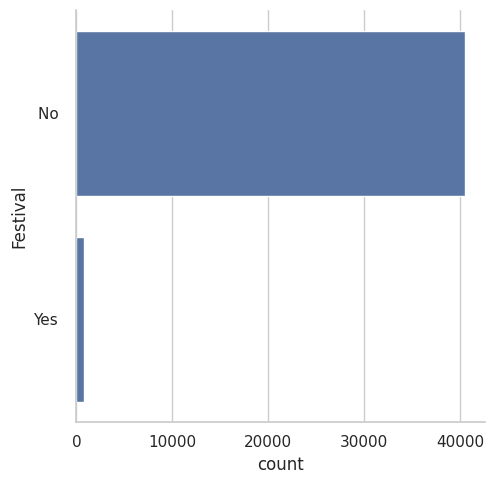

In [ ]:
# Environmental Conditions
sb.catplot(y = 'Festival', data = cleaned_Data, kind = "count")

The significant decrease in food delivery counts during festivals compared to non-festival periods suggests seasonal fluctuations in demand for delivery services. 

This could be attributed to festivals occurring only a few times a year, resulting in fewer delivery orders. Additionally, cultural and familial traditions associated with festivals often prioritize homemade meals, reducing reliance on delivery food orders. 

Furthermore, restaurant closures during festivals may contribute to the decline in delivery counts. It is also probable that individuals who placed orders during festival seasons were influenced by marketing and promotions associated with these occasions.

## Predictors Corresponding to Order Variables:

#### Time Ordered

We want to analyze the peak times for orders, so we've broken down the 'Time Order' variable into hours and minutes. We'll focus specifically on the hour part to determine when people tend to order the most.

In [ ]:
cleaned_Data['Time_Orderd_Hour']=cleaned_Data['Time_Orderd'].str.split(':',expand=True)[0]
cleaned_Data.dropna(subset=['Time_Orderd_Hour'],inplace=True)
cleaned_Data['Time_Orderd_Hour']=cleaned_Data['Time_Orderd_Hour'].astype('int64')
cleaned_Data['Time_Orderd_Min']=cleaned_Data['Time_Orderd'].str.split(':',expand=True)[1]
cleaned_Data['Time_Orderd_Min']=cleaned_Data['Time_Orderd_Min'].astype('int64')
cleaned_Data

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Festival,City,Time_taken(min),Distance_between_restaurant_and_delivery_place(KM),Time_Orderd_Hour,Time_Orderd_Min
0,37,4.9,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,No,Urban,24,3,11,30
1,34,4.5,19:45:00,19:50:00,Stormy,Very High,2,Snack,scooter,No,Metropolitian,33,20,19,45
2,23,4.4,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,No,Urban,26,2,8,30
3,38,4.7,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,No,Metropolitian,21,8,18,0
4,32,4.6,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,No,Metropolitian,30,6,13,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,No,Metropolitian,32,1,11,35
45589,21,4.6,19:55:00,20:10:00,Windy,Very High,0,Buffet,motorcycle,No,Metropolitian,36,11,19,55
45590,30,4.9,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,No,Metropolitian,16,5,23,50
45591,20,4.7,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,No,Metropolitian,26,6,13,35


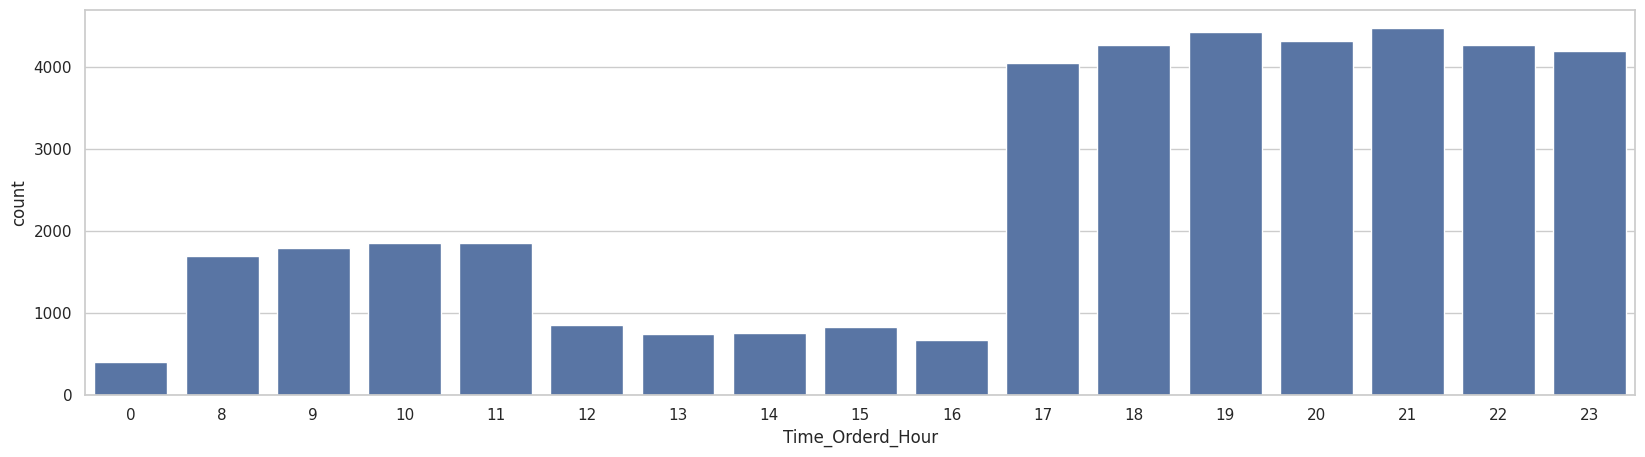

In [ ]:
#Now we plot it out to see what period of time do most people order
plt.figure(figsize=(20,5))
sb.countplot(x=cleaned_Data['Time_Orderd_Hour'])
plt.xticks(rotation='horizontal')
plt.show()


The graphs illustrate a notable absence of orders between 0100 and 0700 hours. The highest ordering hours are observed between 1900 and 2100 hours, followed by 1100 to 1400 hours, and midnight at 0000 hours.

The peak ordering hours, particularly between 1900 and 2100 hours, suggest a significant preference among customers to place their orders in the evening, likely after returning from work or during leisure time, coinciding with dinner hours for many. 

There's also a noteworthy demand for lunchtime meal delivery during the second peak ordering hours, spanning from 1100 to 1400 hours. 

Additionally, late-night orders are evident between 2200 and 0000 hours, possibly due to night shifts, social gatherings, or late-night cravings. Finally, the absence of orders from 0100 to 0700 hours may indicate a period of reduced demand for food delivery while people are asleep.

#### Time Ordered Picked

We also aim to analyze the duration between when an order is placed and when it is picked up. To achieve this, we have split the 'Time Order Picked' variable into hours and minutes.

In [ ]:
cleaned_Data['Time_Orderd_Picked_Hour']=cleaned_Data['Time_Order_picked'].str.split(':',expand=True)[0]
cleaned_Data.dropna(subset=['Time_Orderd_Hour'],inplace=True)
cleaned_Data['Time_Orderd_Picked_Hour']=cleaned_Data['Time_Orderd_Picked_Hour'].astype('int64')
cleaned_Data['Time_Orderd_Picked_Min']=cleaned_Data['Time_Order_picked'].str.split(':',expand=True)[1]
cleaned_Data['Time_Orderd_Picked_Min']=cleaned_Data['Time_Orderd_Picked_Min'].astype('int64')
cleaned_Data

,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Festival,City,Time_taken(min),Distance_between_restaurant_and_delivery_place(KM),Time_Orderd_Hour,Time_Orderd_Min,Time_Orderd_Picked_Hour,Time_Orderd_Picked_Min
0,37,4.9,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,No,Urban,24,3,11,30,11,45
1,34,4.5,19:45:00,19:50:00,Stormy,Very High,2,Snack,scooter,No,Metropolitian,33,20,19,45,19,50
2,23,4.4,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,No,Urban,26,2,8,30,8,45
3,38,4.7,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,No,Metropolitian,21,8,18,0,18,10
4,32,4.6,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,No,Metropolitian,30,6,13,30,13,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,11:35:00,11:45:00,Windy,High,1,Meal,motorcycle,No,Metropolitian,32,1,11,35,11,45
45589,21,4.6,19:55:00,20:10:00,Windy,Very High,0,Buffet,motorcycle,No,Metropolitian,36,11,19,55,20,10
45590,30,4.9,23:50:00,00:05:00,Cloudy,Low,1,Drinks,scooter,No,Metropolitian,16,5,23,50,0,5
45591,20,4.7,13:35:00,13:40:00,Cloudy,High,0,Snack,motorcycle,No,Metropolitian,26,6,13,35,13,40


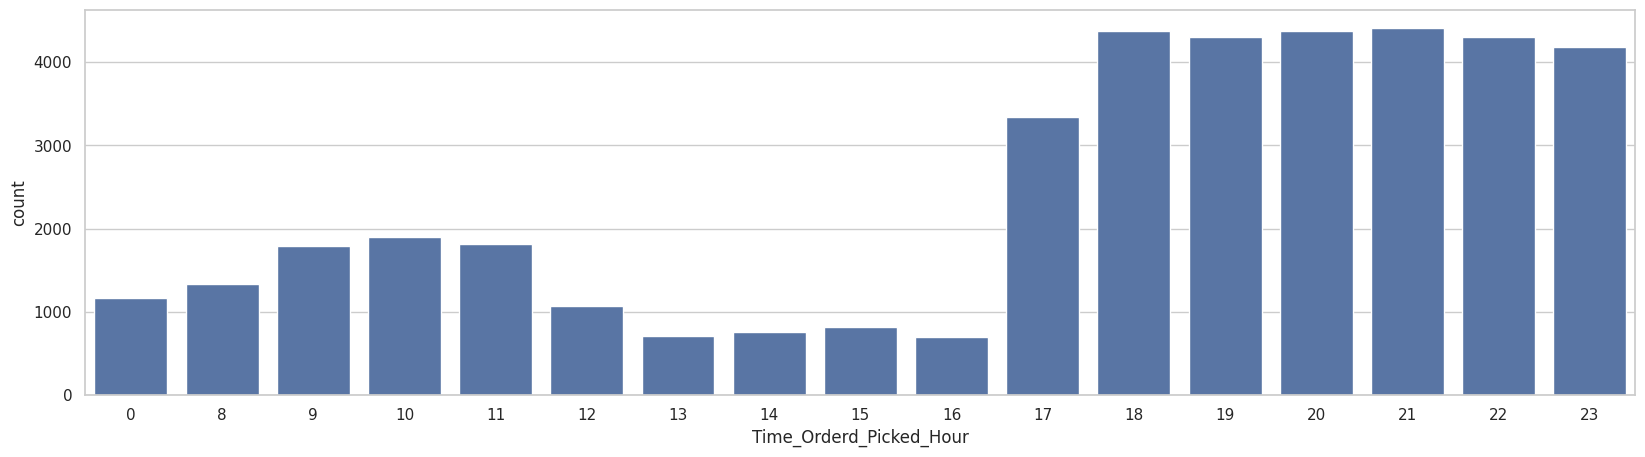

In [ ]:
#Now we plot it out to see what period of time does the order gets pick up
plt.figure(figsize=(20,5))
sb.countplot(x=cleaned_Data['Time_Orderd_Picked_Hour'])
plt.xticks(rotation='horizontal')
plt.show()


The plot reveals a pattern similar to the 'Time Ordered Hour' graph above, indicating that most orders are picked up by delivery personnel within minutes of being placed. 

Since we've plotted only the hour part, the data mostly aligns with the graph above. However, slight discrepancies may occur when orders are placed towards the end of an hour (between 45 to 59 minutes), leading to the delivery person picking up the order in the subsequent hour.

#### Type of Order

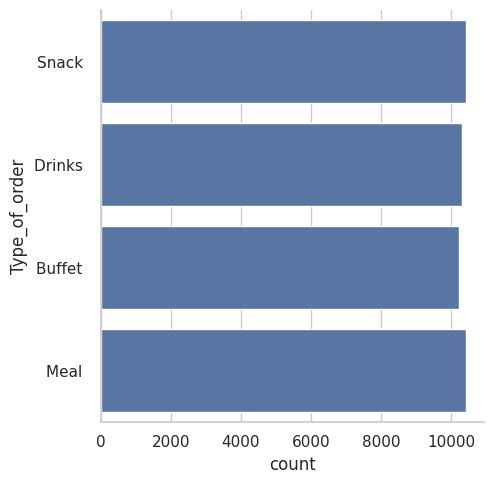

In [ ]:
sb.catplot(y = 'Type_of_order', data = cleaned_Data, kind = "count")

The graph indicates that the count for each type of order is nearly identical. This suggests that customers exhibit diverse preferences and ordering behaviors. 

Some customers may prefer snacks or drinks for quick bites or refreshments, which are often associated with spontaneous or casual orders. 

Conversely, others may opt for buffets or full meals, which are likely favored for planned meals or special occasions.

## Predictors Corresponding to Logisticals Variables

#### Vehicle Condition

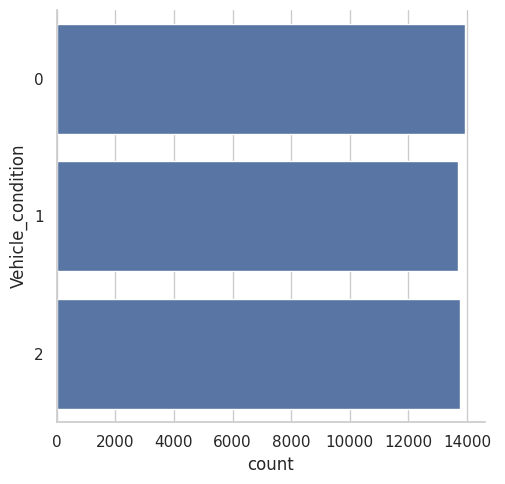

In [ ]:
sb.catplot(y = 'Vehicle_condition', data = cleaned_Data, kind = "count")

Based on the graph above, we observe that the counts for each category are nearly identical. This suggests that the dataset offers a balanced representation of vehicle conditions, implying that it is comprehensive and not biased towards any specific condition. 

Additionally, we can infer that the dataset encompasses deliveries made using vehicles in various states of repair and maintenance. This aspect could be valuable for analyzing the impact of vehicle condition on delivery performance.

#### Type of Vehicle

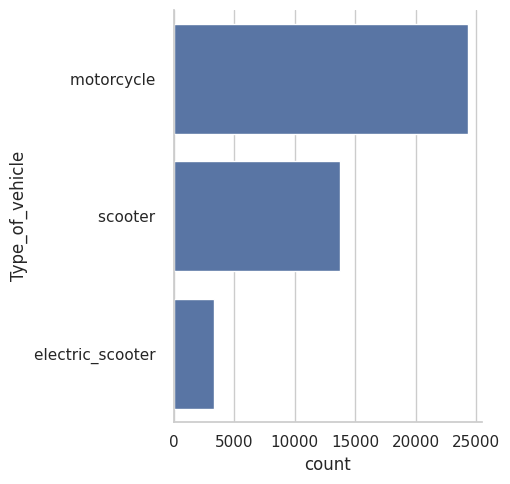

In [ ]:
sb.catplot(y = 'Type_of_vehicle', data = cleaned_Data, kind = "count")

The graph suggests that motorcycles are the preferred choice of vehicle for food delivery services, offering advantages such as speed, maneuverability, and accessibility in navigating through traffic, thus facilitating efficient order delivery in urban and suburban environments. 

The presence of scooters and electric scooters may be attributed to delivery drivers who prioritize factors like fuel efficiency, environmental sustainability, or ease of parking.

#### Distance between restaurant and delivery place

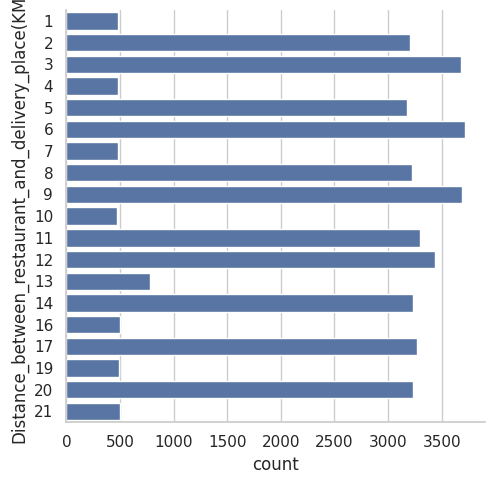

In [ ]:
sb.catplot(y = 'Distance_between_restaurant_and_delivery_place(KM)', data = cleaned_Data, kind = "count") 

This data indicates that delivery services accommodate customers within a radius ranging from 1km to 21km from the restaurant. 

Most distances fall within the range of 2-3km, 5-6km, 8-9km, 11-12km, 14km, 17km, and 20km, suggesting that the majority of delivery orders are made within a moderate distance range. 

The distribution of distances may also reflect customer behavior and preferences regarding food delivery.

## Effect of each variables correspond to time taken for delivery.


### Delivery Person Variables Vs Time Taken


#### Delivery Person Age

<AxesSubplot: title={'center': 'Delivery Person Age vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Delivery_person_Age'>

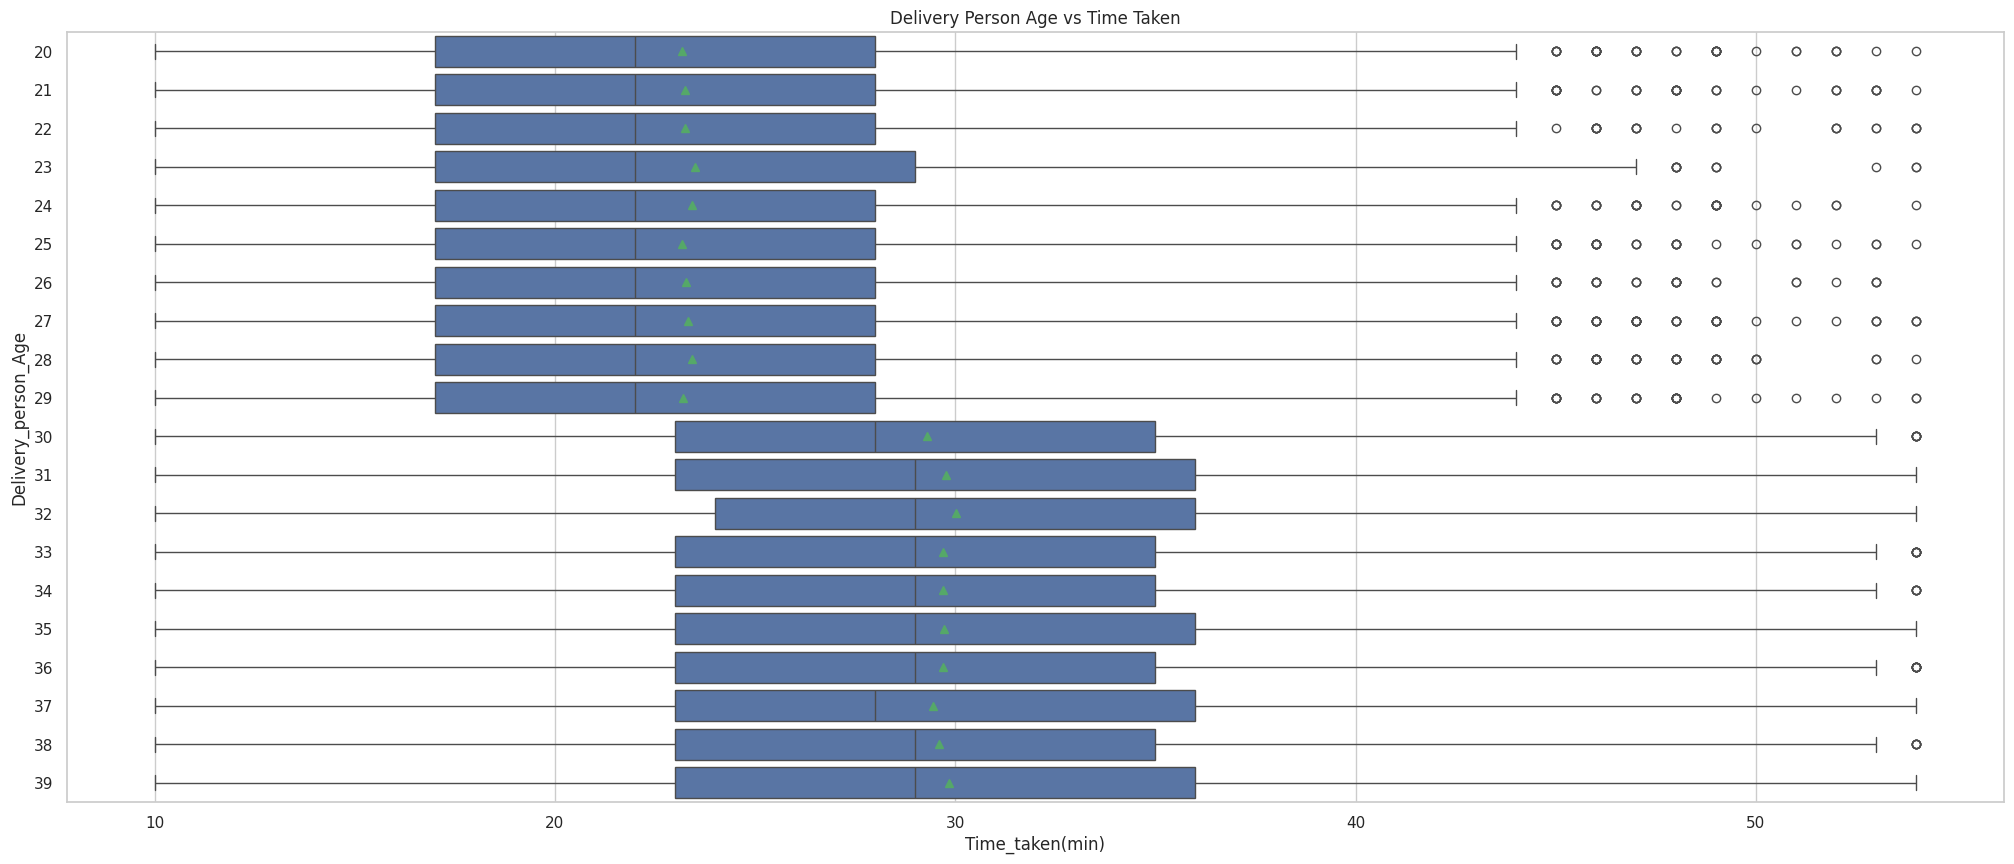

In [ ]:
#Delivery Person Age vs Time Taken, green arrow indicates the mean
plt.figure(figsize=(25,10))
plt.title('Delivery Person Age vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Delivery_person_Age', data=cleaned_Data,orient='h', showmeans=True)

From the boxplot of Delivery Person's Age versus Time Taken, we observe that the average time taken for a delivery person to deliver food increases with age. 

This suggests that older delivery people might take longer to deliver our food. However, we also notice some outliers in the younger age group, indicating that they too may take longer to deliver our food

#### Delivery Person Rating

<AxesSubplot: title={'center': 'Delivery Person Rating vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Delivery_person_Ratings'>

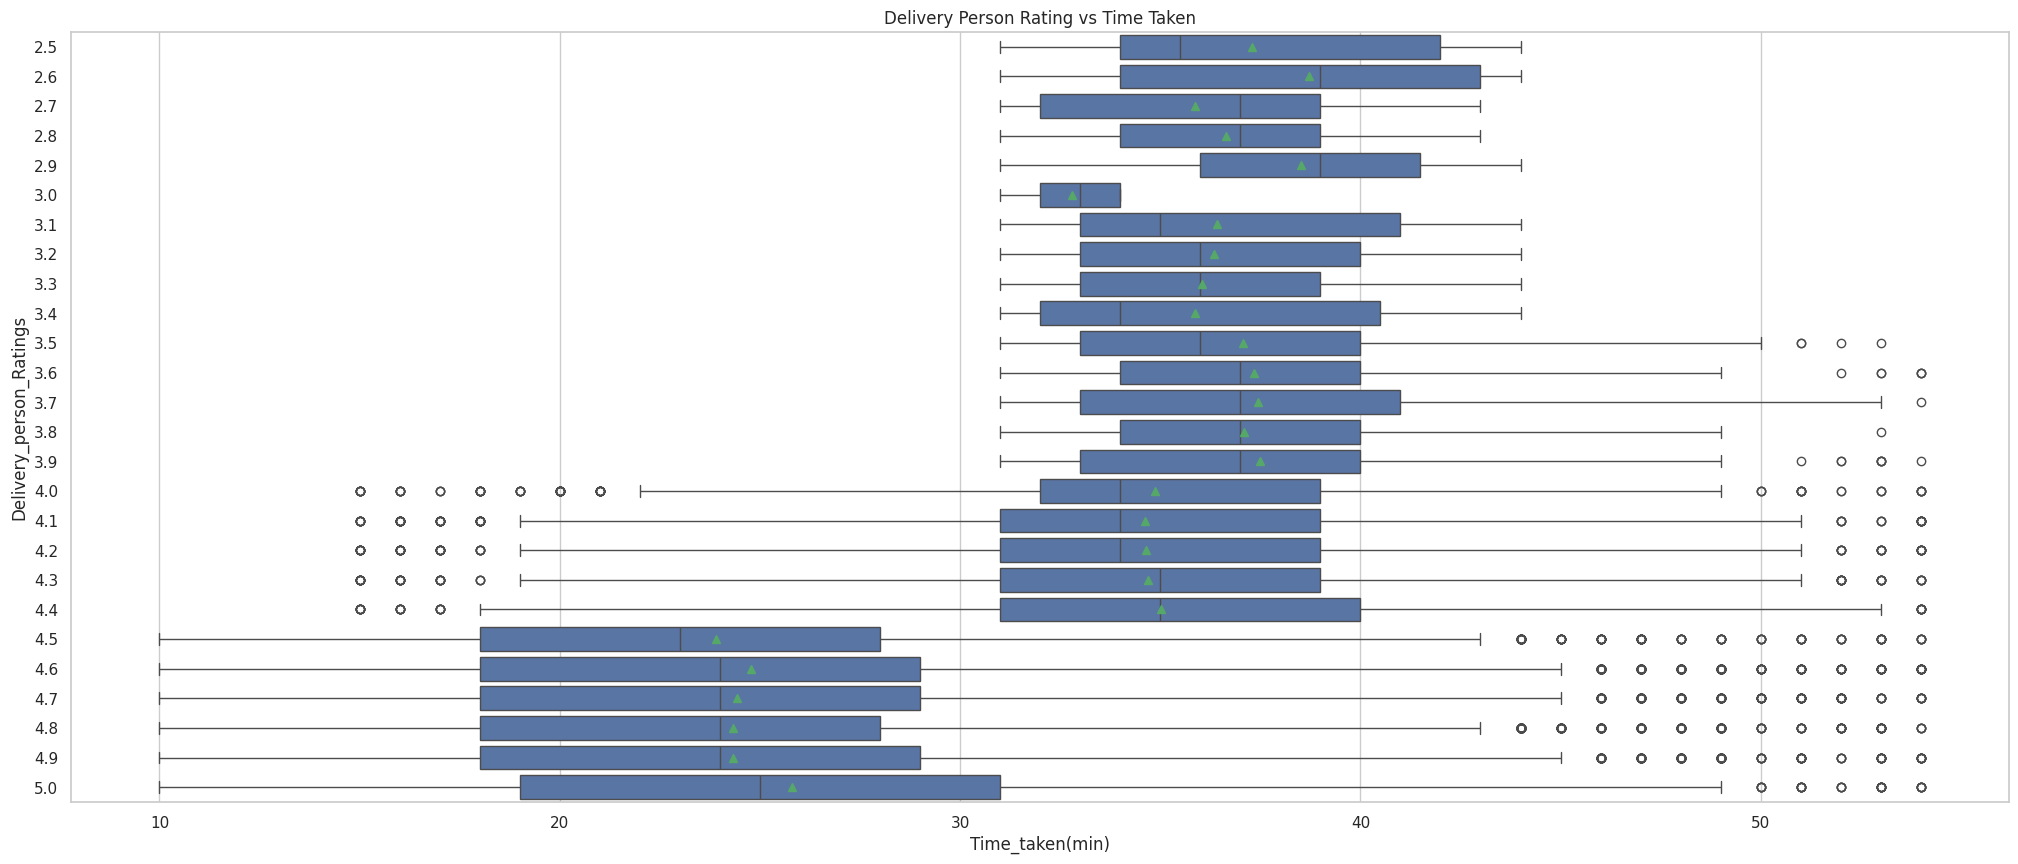

In [ ]:
# Rating vs Amount and Duration
plt.figure(figsize=(25, 10))
plt.title('Delivery Person Rating vs Time Taken')
sb.boxplot(x = 'Time_taken(min)', y = 'Delivery_person_Ratings', data = cleaned_Data, orient='h', showmeans=True)

#plt.figure(figsize=(25,6))
#plt.subplot(1,2,2)
#rating = cleaned_Data.groupby('Delivery_person_Ratings')['Time_taken(min)'].median().reset_index()
#sb.lineplot(x='Delivery_person_Ratings', y='Time_taken(min)', data=rating)

From the box plot above, it is apparent that the rating of the delivery person is influenced by the time taken for delivery. A trend emerges where lower ratings correspond to longer delivery times. This indicates that the rating of the delivery person may serve as a useful predictor in estimating the time taken for delivery.

Furthermore, we observe that delivery persons with ratings between 4.5 and 5.0 tend to have shorter delivery times. This suggests that higher-rated delivery persons are generally more efficient or effective in completing deliveries within shorter time frames.

### Environment Variables vs Time Taken:

#### Weather Condition

<AxesSubplot: title={'center': 'Weather Conditions vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Weatherconditions'>

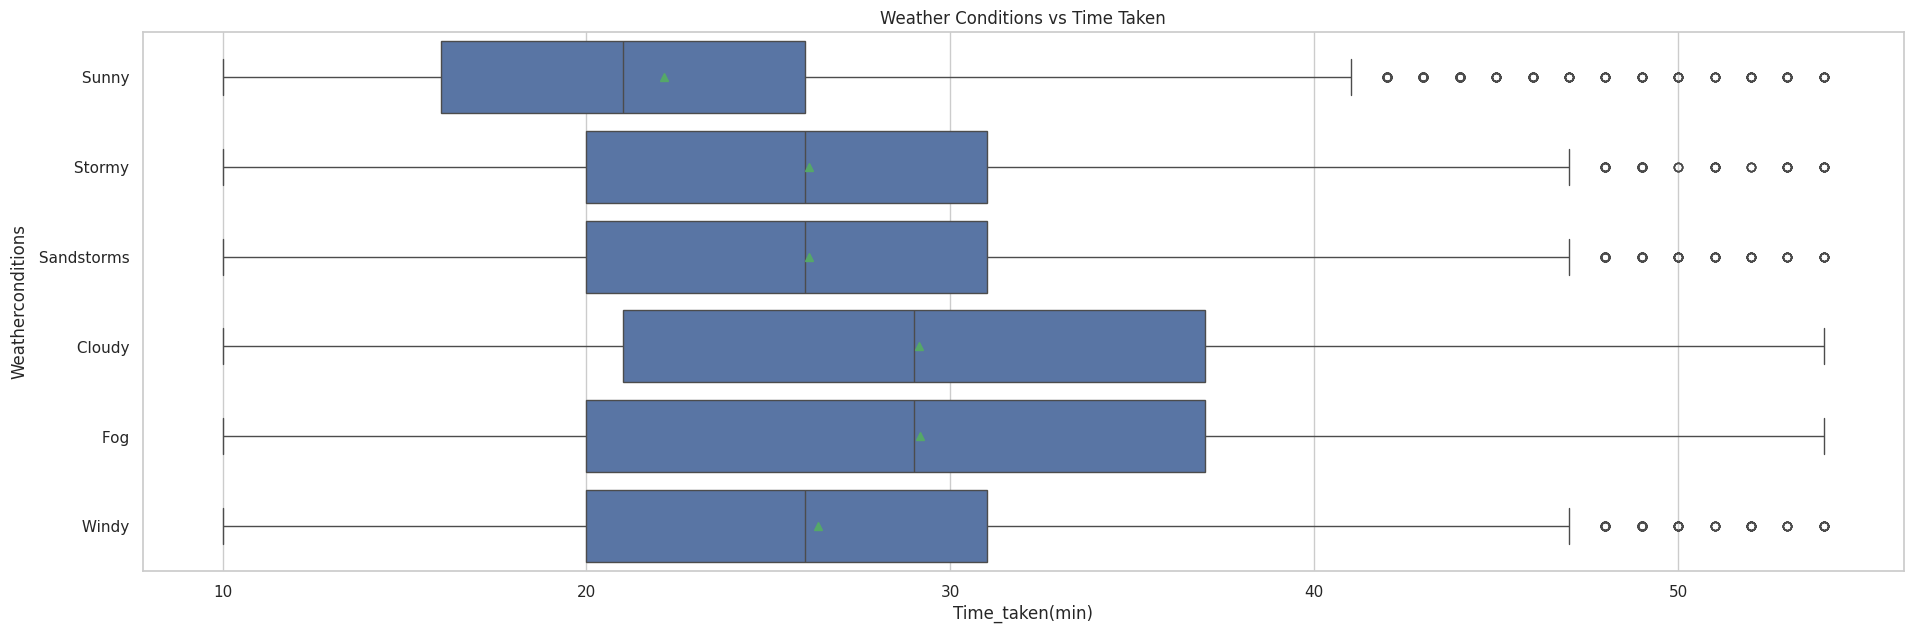

In [ ]:
#First we will like to see if the different weather conditions affects the time taken for delivery
plt.figure(figsize=(50,7))
plt.subplot(1,2,2)
plt.title('Weather Conditions vs Time Taken')
sb.boxplot(x=cleaned_Data['Time_taken(min)'], y='Weatherconditions', data=cleaned_Data, showmeans=True)

From the boxplot, we observe that the time taken for delivery is longest during cloudy and foggy weather conditions. 

This is somewhat surprising, as one would expect stormy and sandstorm conditions to significantly impact delivery times due to their harshness. 

However, this unexpected finding might be attributed to fewer drivers willing to make deliveries during stormy and sandstorm weather, resulting in limited data for these conditions. 

#### Road Traffic Density

<AxesSubplot: title={'center': 'Road Traffic Density vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Road_traffic_density'>

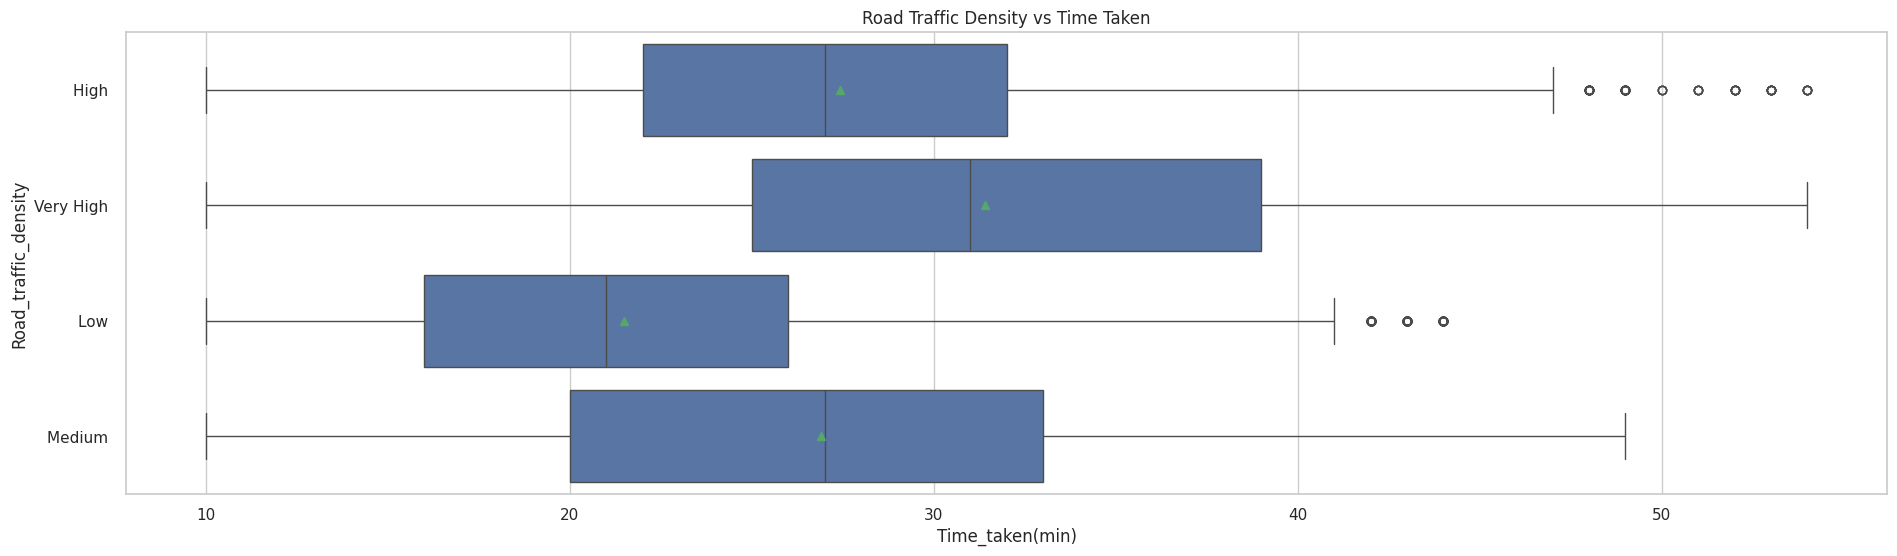

In [ ]:
# Next, we like to see if the amount of traffic affect the Delivery time
plt.figure(figsize=(50,6))
plt.subplot(1,2,2)
plt.title('Road Traffic Density vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Road_traffic_density', data=cleaned_Data,showmeans=True)

As expected, the boxplot indicates that low traffic density has the lowest mean delivery time compared to other traffic conditions, while very high traffic density has the highest mean delivery time. 

This suggests that lower traffic density enables delivery persons to complete deliveries at a faster rate compared to other traffic conditions. This observation could serve as a useful predictor for estimating delivery times.

#### City

<AxesSubplot: title={'center': 'Type of City vs Time Taken'}, xlabel='Time_taken(min)', ylabel='City'>

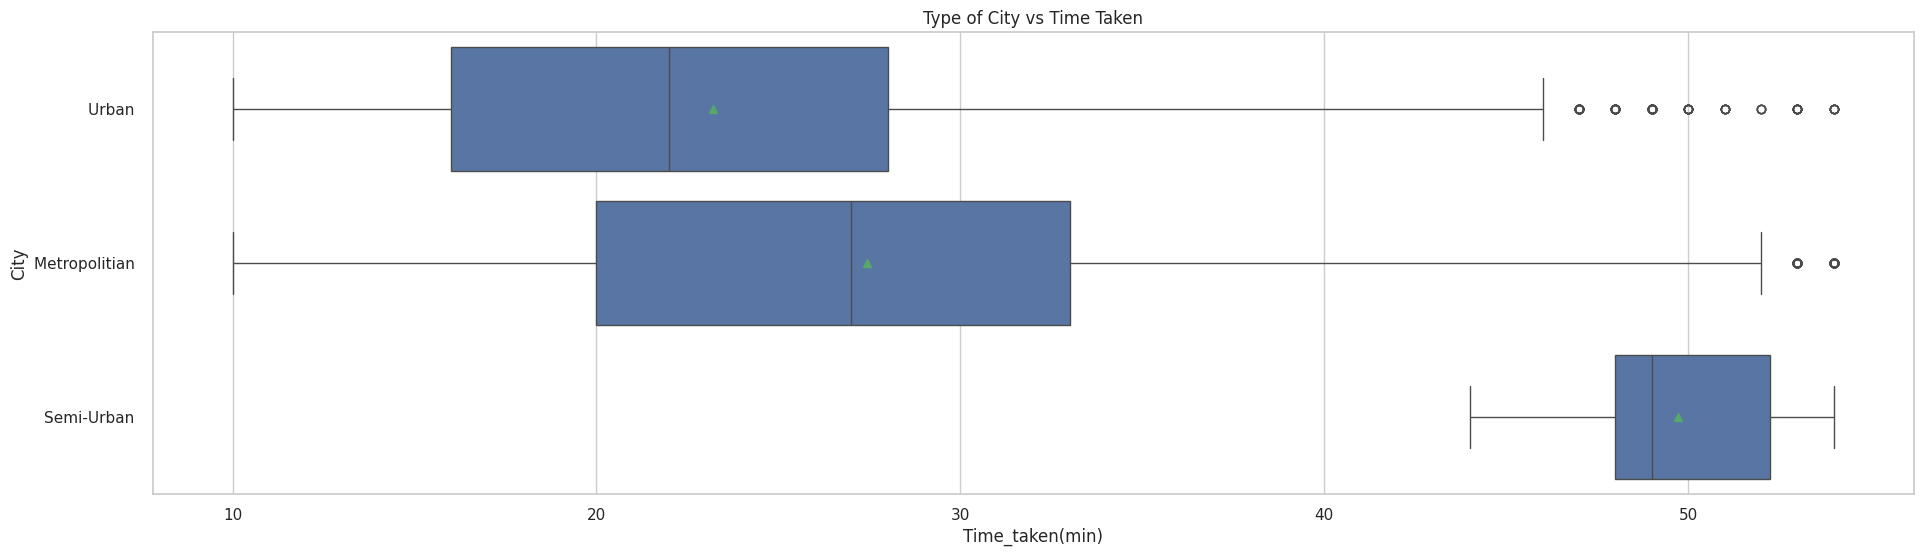

In [ ]:
# Now we like to see if the different type of cities affect the Delivery time
plt.figure(figsize=(50,6))
plt.subplot(1,2,2)
plt.title('Type of City vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='City', data=cleaned_Data, showmeans=True)


The boxplot reveals that the longest delivery times occur in semi-urban cities. This could be attributed to factors such as less developed infrastructure, fewer transportation options, or longer distances between delivery points in semi-urban areas, all contributing to extended delivery times. 

Conversely, urban areas, characterized by higher population density and better infrastructure, likely facilitate more efficient delivery operations, resulting in shorter delivery times. Delivery persons in urban areas may encounter less traffic congestion, shorter travel distances, and easier navigation compared to those in semi-urban areas. 

While metropolitan areas generally boast more advanced infrastructure and transportation networks compared to semi-urban areas, the variability in delivery times depicted by the box plot suggests that delivery times in metropolitan areas may fluctuate. This variability could be influenced by factors such as traffic congestion, population density, and the size and layout of the city

#### Festival

<AxesSubplot: title={'center': 'Festival vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Festival'>

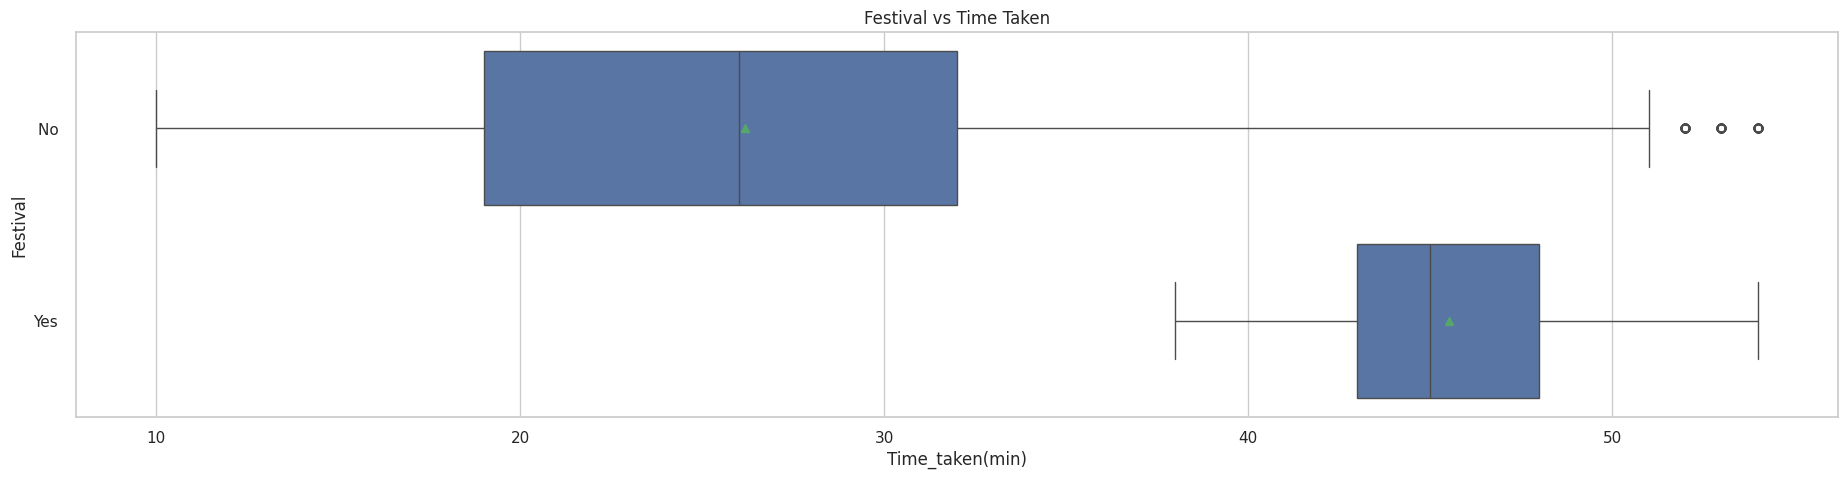

In [ ]:
#Festival
plt.figure(figsize=(50, 5))
plt.subplot(1, 2, 1)
plt.title('Festival vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Festival', data=cleaned_Data, showmeans=True)

From this boxplot, we observe that if the day people place orders happens to be a festive day, delivery times tend to be longer. This could be due to restaurants being busier during festive periods, resulting in longer waiting times. 

Additionally, streets may be congested during festive periods, further impacting delivery times.

### Order variables against time taken

#### Time Order

<AxesSubplot: title={'center': 'Time Orderd(Hour) vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Time_Orderd_Hour'>

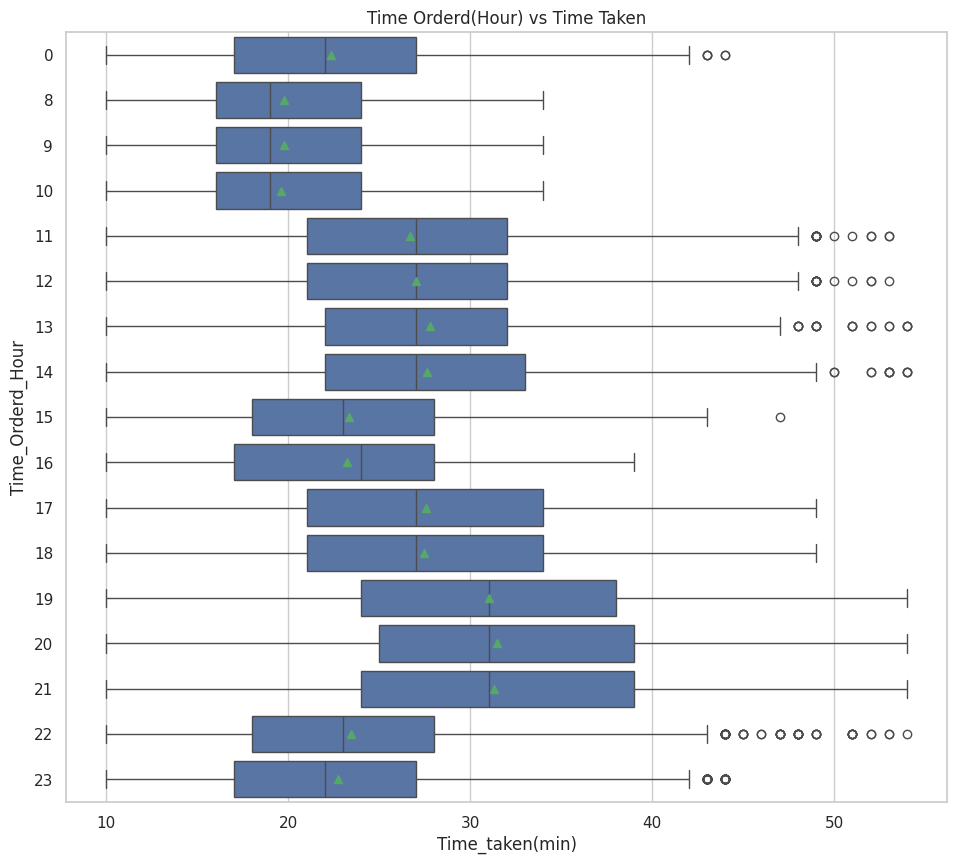

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,2)
plt.title('Time Orderd(Hour) vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Time_Orderd_Hour', data=cleaned_Data, orient='h', showmeans=True)

We can observe that delivery orders placed between 1700-2100hrs take the longest delivery time. This could be attributed to the fact that this time range corresponds to peak dinner hours, with many customers ordering food for their evening meals. 

During this time, restaurants may experience higher order volumes, leading to longer preparation times. Additionally, increased traffic congestion during rush hour can further delay delivery drivers, contributing to extended delivery times. 

Moreover, delivery services may experience higher demand and limited availability of delivery personnel during peak hours, leading to longer wait times for deliveries.

#### Time Order Picked

<AxesSubplot: title={'center': 'Time Orderd Picked (Hour) vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Time_Orderd_Picked_Hour'>

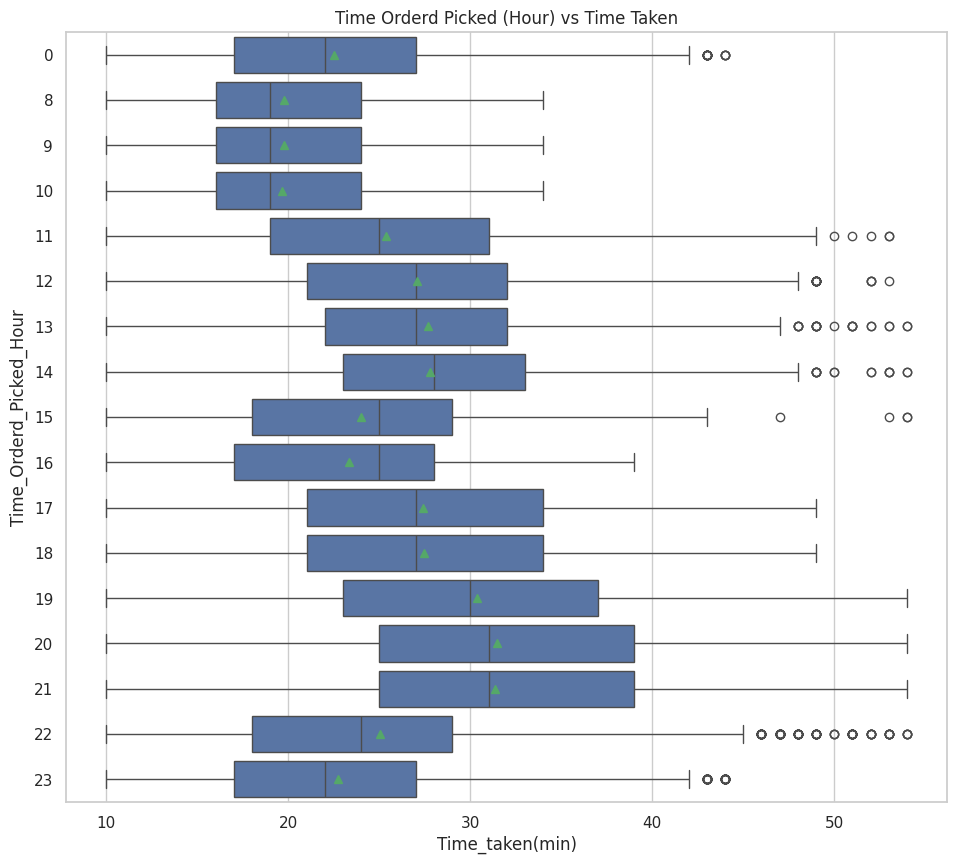

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,2)
plt.title('Time Orderd Picked (Hour) vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Time_Orderd_Picked_Hour', data=cleaned_Data, orient='h', showmeans=True)

The boxplot closely resembles that of Time Ordered, indicating that delivery persons typically pick up orders within minutes of them being made. 

However, we can observe that delivery times are longest around 1700 to 2100hrs, which coincides with peak hours. During this time range, restaurants experience heightened demand, leading to longer preparation times. 

Additionally, increased traffic congestion during rush hour can further delay delivery drivers, contributing to extended delivery times.

#### Type of Order

<AxesSubplot: title={'center': 'Type of order vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Type_of_order'>

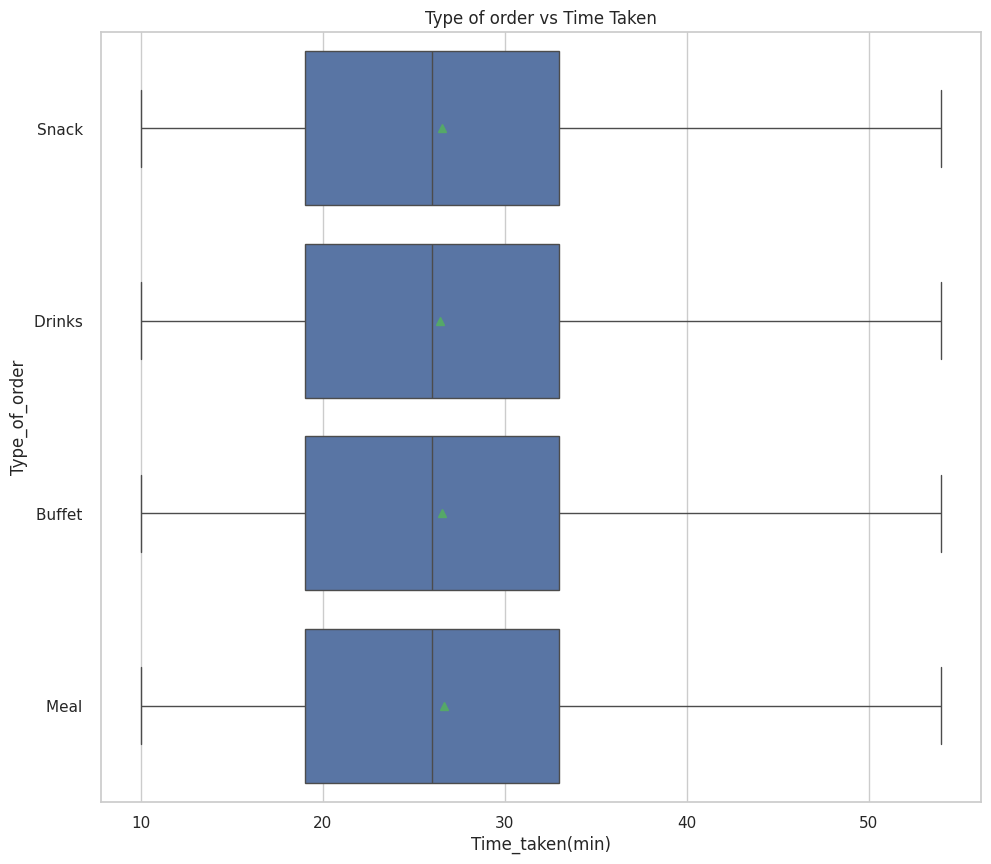

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,2)
plt.title('Type of order vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Type_of_order', data=cleaned_Data, orient='h', showmeans=True)

The graph suggests that the type of order does not significantly influence the delivery time, as evidenced by similar median and mean values across different order types. 

Additionally, it's possible that delivery services employ strategies to prioritize and manage orders effectively, regardless of their type, to ensure consistent delivery times for customers. 

As such, while the type of order may provide some insight into customer preferences, it may not be a robust predictor for estimating delivery times.

### Logisticals variables against time taken:

#### Vehicle condition

<AxesSubplot: title={'center': 'vehicle condition vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Vehicle_condition'>

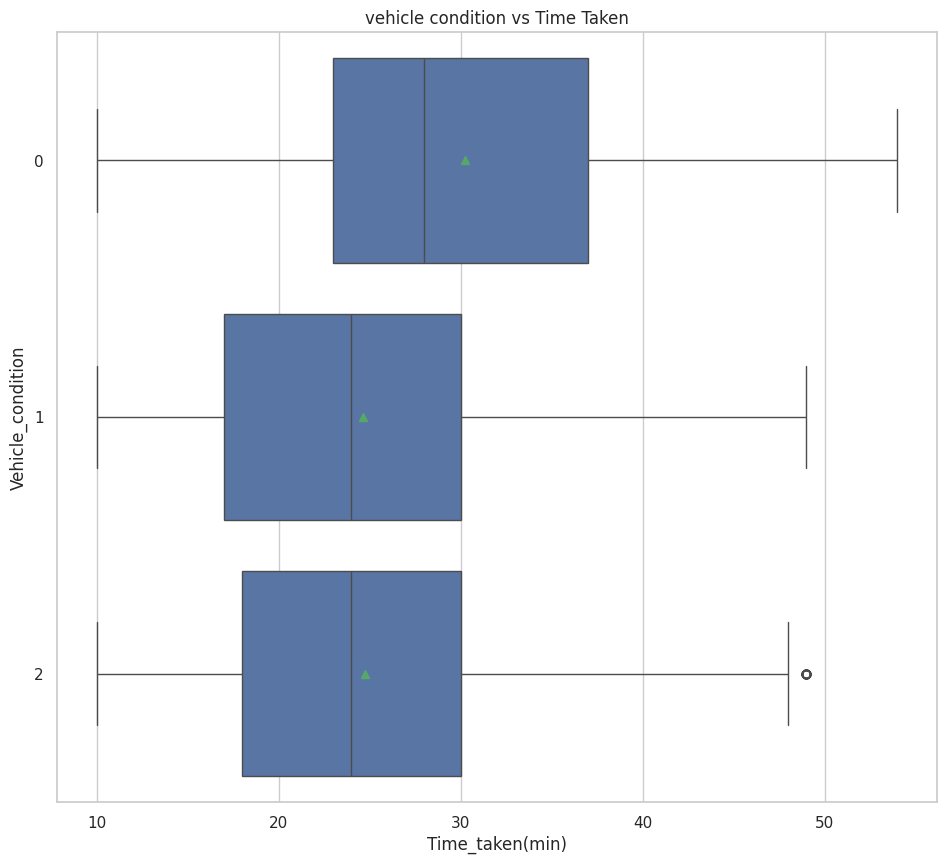

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,2)
plt.title('vehicle condition vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Vehicle_condition', data=cleaned_Data, orient='h', showmeans=True)

The graph indicates that a vehicle condition rated as '0' (bad) results in the longest delivery time, while a condition rated as '2' (very good) leads to the shortest delivery time. 

This suggests that when the vehicle condition is poor, speed may be adversely affected, resulting in longer delivery times compared to vehicles in good condition.

#### Type of vehicle

<AxesSubplot: title={'center': 'Type of vehicle vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Type_of_vehicle'>

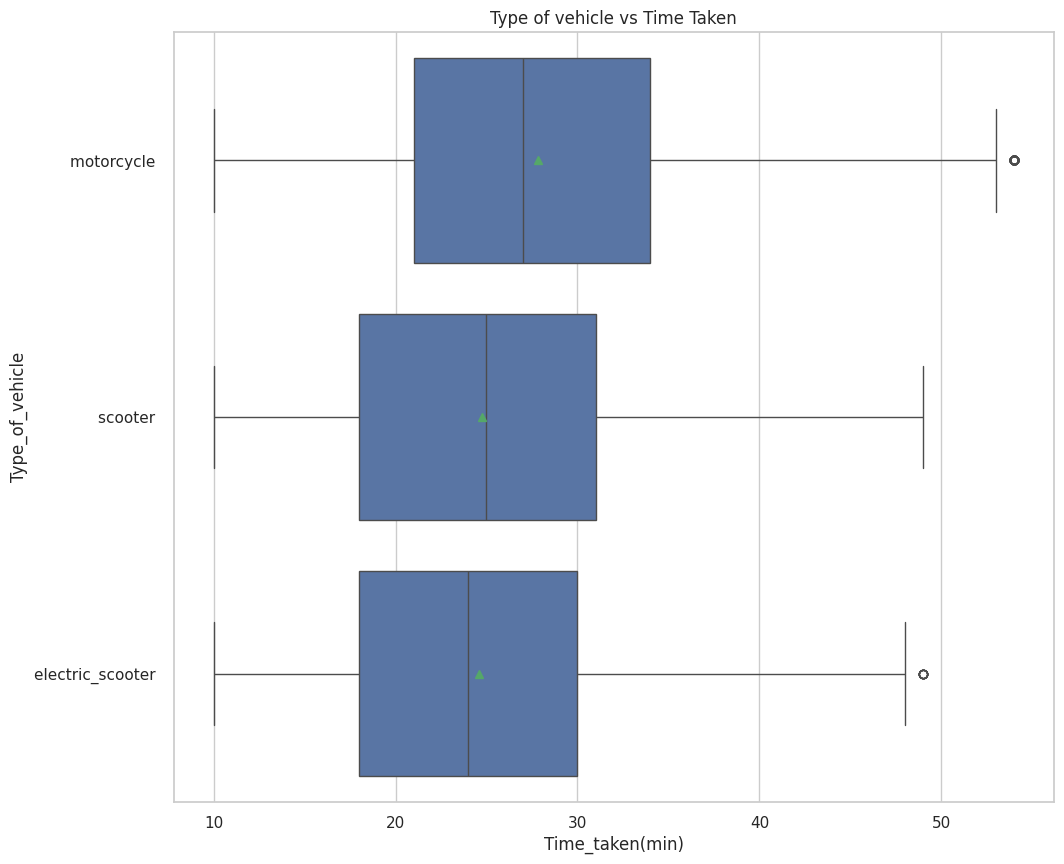

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,2)
plt.title('Type of vehicle vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Type_of_vehicle', data=cleaned_Data, orient='h', showmeans=True)

We can observe that motorcycles take the longest time to deliver, while electric scooters take the shortest time. This could be due to motorcycles being restricted to roads, which are often affected by traffic density. 

In contrast, scooters and electric scooters are not only permitted on pedestrian walkways but may also utilize shortcut routes, such as alleyways, which motorcycles are not allowed to take. These factors enable scooters and electric scooters to navigate through traffic more efficiently, resulting in shorter delivery times.

#### Distance between restaurant and delivery place

<AxesSubplot: title={'center': 'Distace between restaurant and delivery place vs Time Taken'}, xlabel='Time_taken(min)', ylabel='Distance_between_restaurant_and_delivery_place(KM)'>

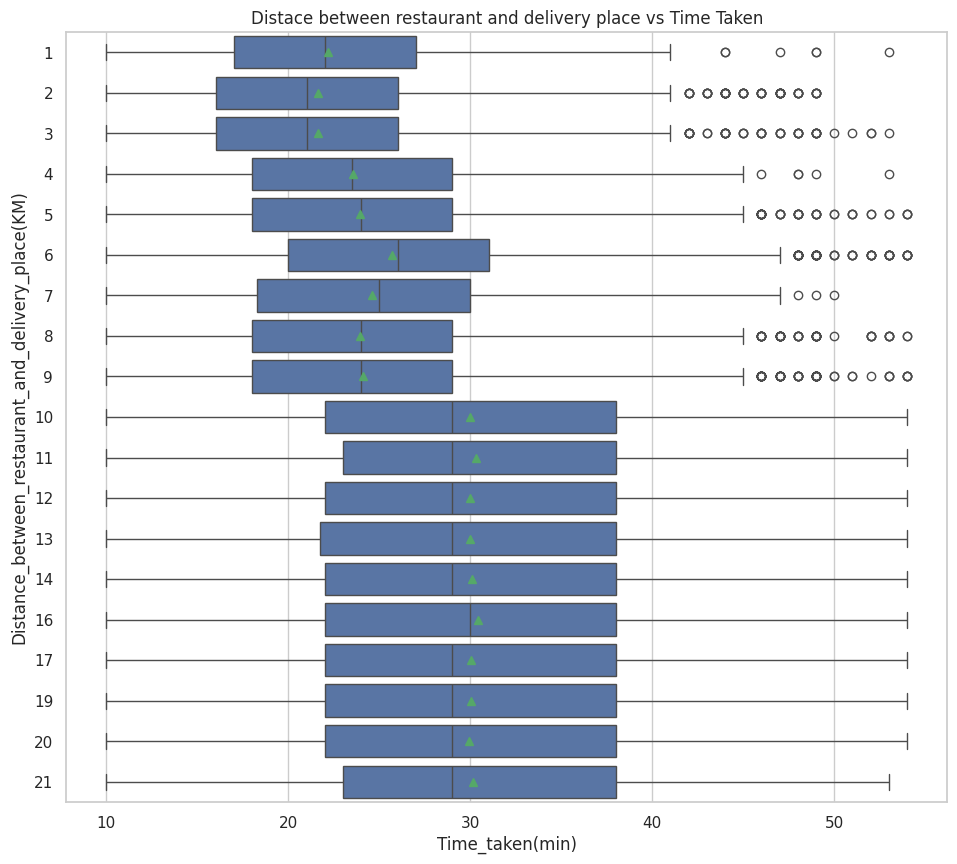

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,2)
plt.title('Distace between restaurant and delivery place vs Time Taken')
sb.boxplot(x='Time_taken(min)', y='Distance_between_restaurant_and_delivery_place(KM)', data=cleaned_Data, orient='h', showmeans=True)

The graph clearly illustrates that as the distance between the restaurant and the destination grows, so does the delivery time. This relationship suggests that distance is a significant factor influencing delivery duration. 

Longer distances may require more time for the delivery person to travel, contributing to increased delivery times. Therefore, considering the distance between the restaurant and the destination could be a reliable predictor for estimating delivery times.

### Determine top 3 numerical variables

We determined the top 3 numerical variables among all the numerical variables to be used to train our models later using a correlation heatmap. From the correlation matrix, we found that the top 3 numerical variables with a stronger relationship to the time taken for delivery are delivery person age, delivery person ratings, and the distance between the restaurant and the delivery place

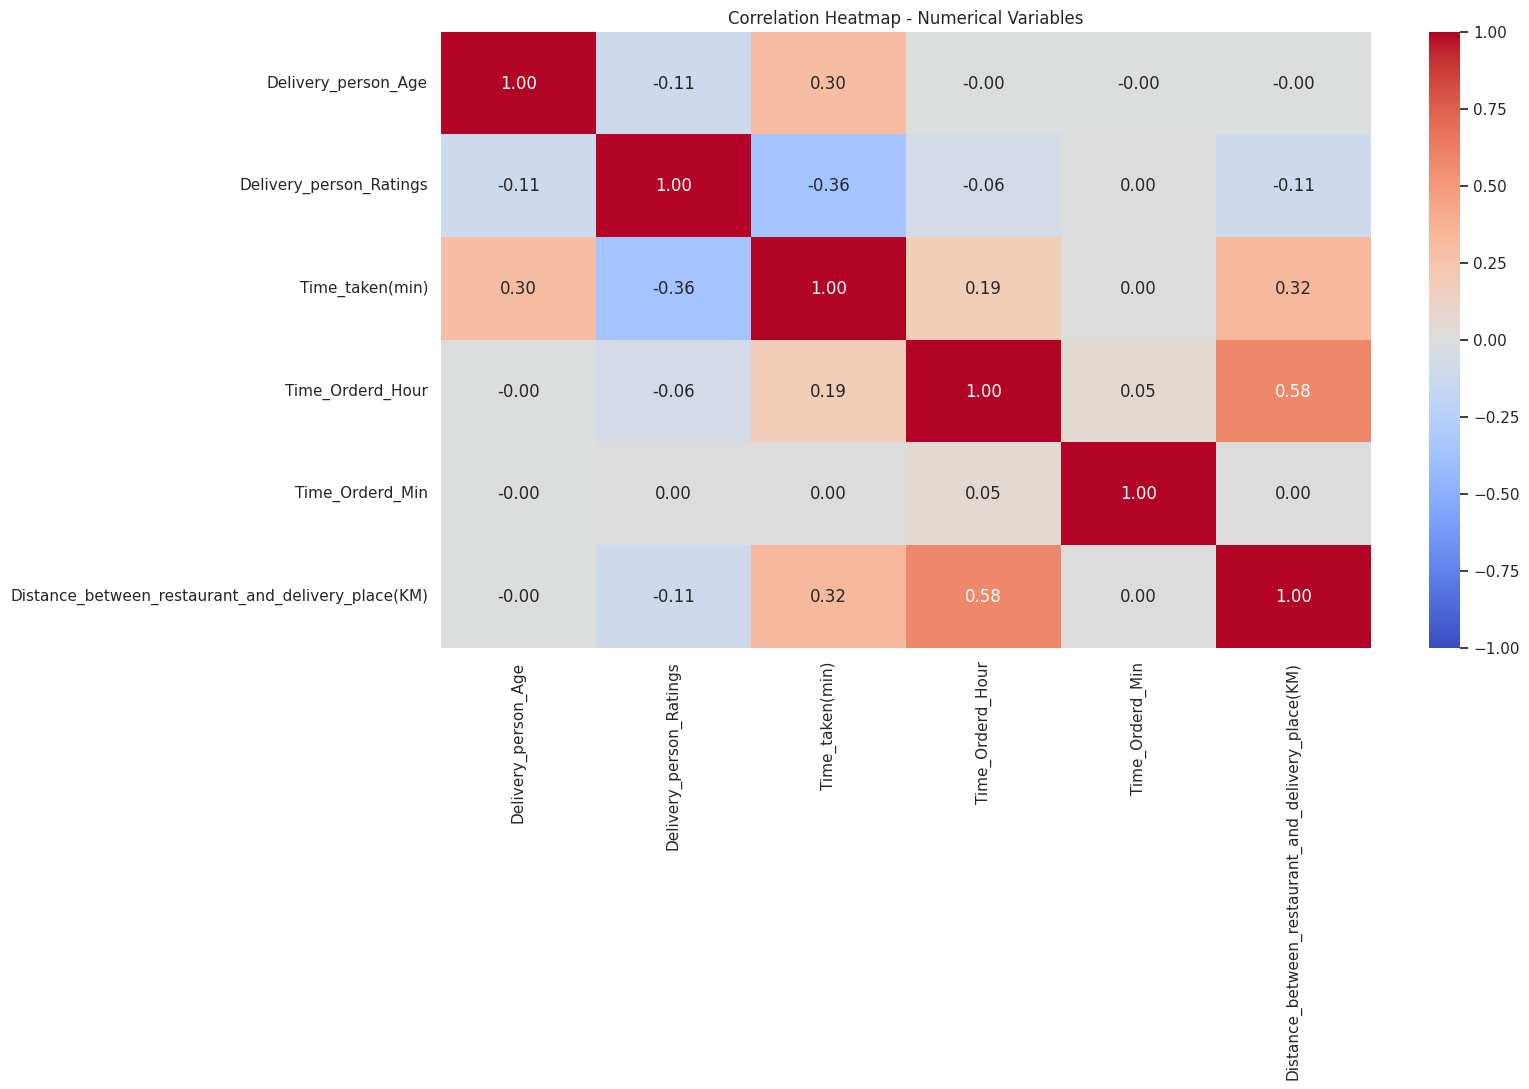

In [ ]:
joint_DF = pd.DataFrame(cleaned_Data[['Delivery_person_Age','Delivery_person_Ratings','Time_taken(min)','Time_Orderd_Hour', 'Time_Orderd_Min', 'Distance_between_restaurant_and_delivery_place(KM)']])
f = plt.figure(figsize=(15,8))
sb.heatmap(joint_DF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap='coolwarm')
plt.title('Correlation Heatmap - Numerical Variables')
plt.show()

### Determine top 3 categorical variables

Next, we determined the top 3 categorical variables among all to be used to train our models later. To do this, we employed three methods:

1) Cramér's V
2) Correlation Heatmap
3) Random Forest Regression


From all three methods, we found that using the Random Forest Regression method to determine the top 3 categorical variables was the most accurate and suitable. Below, we provide a more detailed explanation.

#### Cramér's V

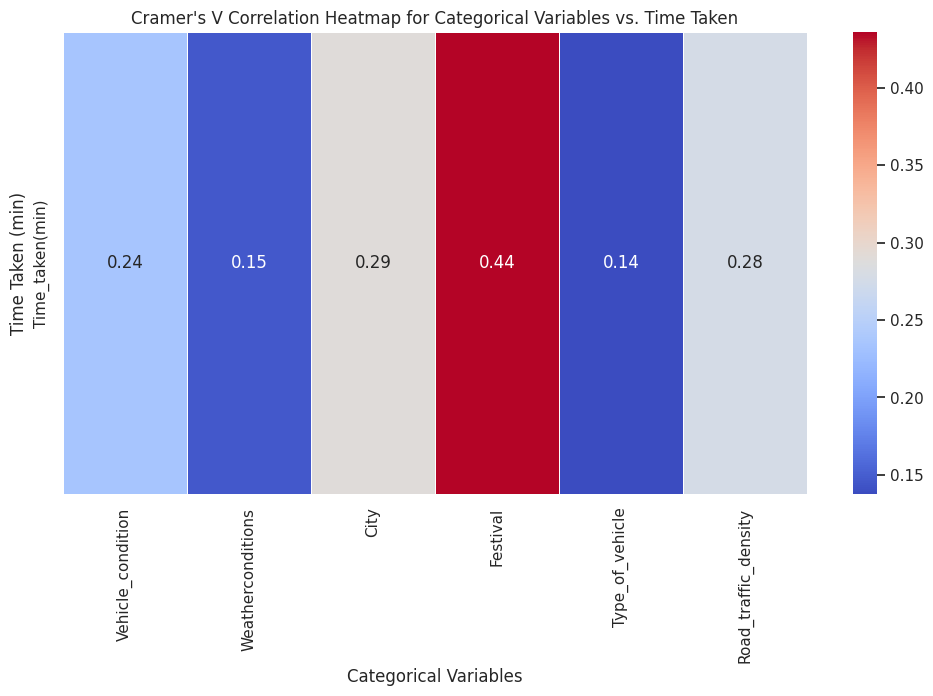

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute Cramer's V for each pair of categorical variables
categorical_columns = ['Vehicle_condition', 'Weatherconditions', 'City', 'Festival', 'Type_of_vehicle', 'Road_traffic_density']
corr_matrix_categorical = pd.DataFrame(index=categorical_columns, columns=['Time_taken(min)'])
for col in categorical_columns:
    corr_matrix_categorical.loc[col, 'Time_taken(min)'] = cramers_v(cleaned_Data[col], cleaned_Data['Time_taken(min)'])

# Plot the heatmap for categorical variables vs. 'Time_taken'
plt.figure(figsize=(12, 6))
sb.heatmap(corr_matrix_categorical.T.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Cramer\'s V Correlation Heatmap for Categorical Variables vs. Time Taken')
plt.xlabel('Categorical Variables')
plt.ylabel('Time Taken (min)')
plt.show()

Cramér's V varies from 0 (corresponding to no association between the variables) to 1 (complete association) and can reach 1 only when each variable is completely determined by the other. It may be viewed as the association between two variables as a percentage of their maximum possible variation.

From the Cramér's V correlation heatmap, the top 3 categorical variables which have stronger relationship with the time taken for delivery is `festival`, `city` and `road_traffic_density`.

However Cramers V is NOT the most suitable statistic to determine which of the 6 categorical variables is the best predictor of time taken (numerical). This is because Cramer's V measures the association between pairs of categorical variables, but it does not inherently provide information about the predictive power of each individual variable.

To determine the predictive power of each categorical variable on a numerical target variable like "time taken," other methods such as feature importance analysis in machine learning models, like the Random Forest Regression model would be more appropriate. These methods analyze the contribution of each feature to the predictive performance of the model and can provide insights into which variables are the most influential in predicting the target variable.

In summary, while Cramer's V is useful for understanding the association between pairs of categorical variables, it is not directly applicable for determining the predictive power of individual variables on a numerical target variable. Other methods, such as feature importance analysis in machine learning models, are better suited for this purpose.

### Correlation Heatmap (One-Hot Encoded)

#### Why One-Hot Encoding?
1. When plotting a correlation matrix for categorical variables against a numerical target variable `Time_taken(min)`, one-hot encoding is often used to convert categorical variables into a format that can be handled by correlation-based analysis. 
2. Numerical Representation: Categorical variables, being non-numeric, cannot be directly used with correlation coefficients. One-hot encoding converts categorical variables into a numerical format that can be used in correlation analysis.
3. Dummy Variables: One-hot encoding creates dummy variables for each category in a categorical variable, representing them as binary (0 or 1) variables. This transformation allows us to quantify the presence or absence of each category in relation to the numerical target variable.
4. Independence Assumption: Correlation analysis assumes that the variables being compared are continuous and independent. One-hot encoding creates independent binary variables for each category, preserving the independence assumption required for correlation analysis.

Vehicle_condition                   -0.241702
Weatherconditions_ Cloudy            0.124491
Weatherconditions_ Fog               0.127975
Weatherconditions_ Sandstorms       -0.021000
Weatherconditions_ Stormy           -0.021400
Weatherconditions_ Sunny            -0.206099
Weatherconditions_ Windy            -0.009358
City_Metropolitian                   0.171447
City_Semi-Urban                      0.150659
City_Urban                          -0.194176
Festival_No                         -0.291264
Festival_Yes                         0.291264
Type_of_vehicle_electric_scooter    -0.062478
Type_of_vehicle_motorcycle           0.164883
Type_of_vehicle_scooter             -0.136224
Road_traffic_density_High            0.030347
Road_traffic_density_Low            -0.387234
Road_traffic_density_Medium          0.021114
Road_traffic_density_Very High       0.354319
Time_taken(min)                      1.000000
Name: Time_taken(min), dtype: float64


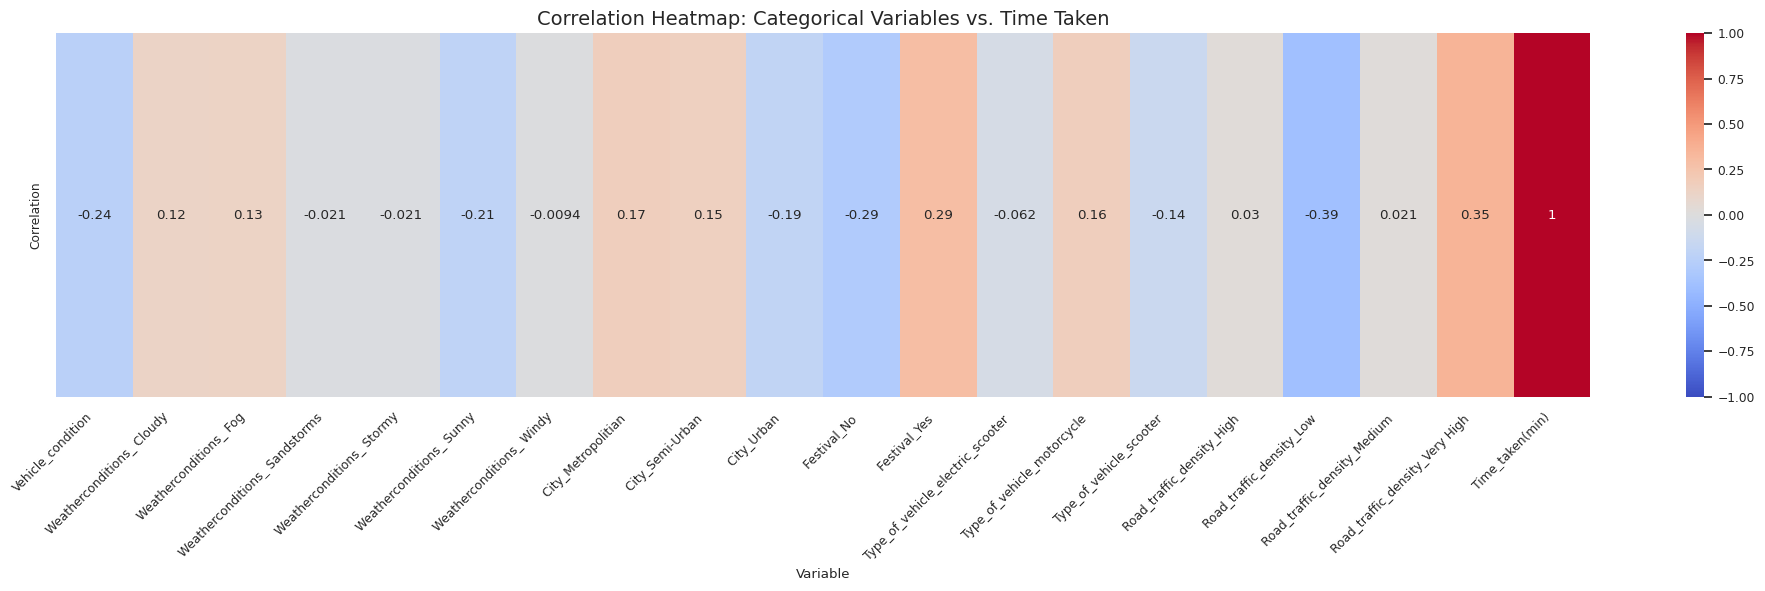

In [ ]:
categorical_cols = ['Vehicle_condition', 'Weatherconditions', 'City', 'Festival', 'Type_of_vehicle', 'Road_traffic_density']

# Select only the columns specified in categorical_cols
categorical_data = cleaned_Data[categorical_cols]

# One-hot encode the categorical variables
encoded_data = pd.get_dummies(categorical_data)

# Merge the encoded categorical variables with the target variable
merged_data = pd.concat([encoded_data, cleaned_Data['Time_taken(min)']], axis=1)

# Calculate the correlation matrix
corr_matrix = merged_data.corr(method='pearson')['Time_taken(min)']
print(corr_matrix)

# Convert Series to DataFrame
corr_df = pd.DataFrame(corr_matrix.reset_index())
corr_df.columns = ['Variable', 'Correlation']

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 6))
heatmap = sb.heatmap(corr_df.set_index('Variable').T, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation Heatmap: Categorical Variables vs. Time Taken', fontsize=14)
plt.tight_layout()
plt.show()

Correlation coefficients measure the strength and direction of the linear relationship between two variables, but they may not capture complex relationships between categorical and numerical variables. Categorical variables may have non-linear relationships with numerical variables, and correlation coefficients may not adequately capture such relationships.

Therefore, while you can compute the correlation matrix and visualize it using a heatmap as shown in the provided code, it may not directly determine which categorical variable is the "best" predictor of the numerical target variable.

#### Correlation Heatmap and Cramers V is NOT the best way to determine the top categorical factors.

| Aspect                           | Correlation Heatmap                      | Cramér's V                                    |
|----------------------------------|------------------------------------------|-----------------------------------------------|
| **Purpose**                      | Analyze linear relationship between continuous variables | Measure association between categorical variables |
| **Applicability**                | Continuous variables                    | Categorical variables                          |
| **Measure**                      | Pearson correlation coefficient         | Cramér's V (based on chi-square statistic)     |
| **Range**                        | -1 to 1                                 | 0 to 1                                         |
| **Interpretation**               | -1: Perfect negative linear relationship | 0: No association                              |
|                                  | 0: No linear relationship               | 1: Perfect association                         |
|                                  | 1: Perfect positive linear relationship |                                                 |
| **Explanation for Dataset**      | Correlation heatmap is suitable for identifying linear relationships between continuous variables, but it may not capture associations between categorical variables and the target variable well. | Cramér's V is specifically designed for measuring associations between categorical variables, making it suitable for identifying relationships between categorical variables and the target variable. |
| **Limitations**                  | It may not effectively capture non-linear relationships or associations between categorical variables and the target variable. | It may not fully capture complex relationships or interactions between categorical variables and the target variable, especially if there are many categories or sparse data in certain categories. |


#### Random Forest Regression 

Plotting Feature Importance Bar Chart using Random Forest Regression

#### One-Hot Encoded Feature Importance:

Top Features:
                          Feature  Importance
        Road_traffic_density_Low     0.322323
              Vehicle_condition_0    0.181165
         Weatherconditions_ Sunny    0.158803
  Road_traffic_density_Very High     0.069331
           Weatherconditions_ Fog    0.054056
                     Festival_No     0.051514
        Weatherconditions_ Cloudy    0.043122
                    Festival_Yes     0.039579
                      City_Urban     0.017980
                 City_Semi-Urban     0.016489
              City_Metropolitian     0.014346
     Road_traffic_density_Medium     0.007159
       Road_traffic_density_High     0.007140
    Weatherconditions_ Sandstorms    0.002578
        Weatherconditions_ Stormy    0.002438
         Weatherconditions_ Windy    0.002247
         Type_of_vehicle_scooter     0.002131
      Type_of_vehicle_motorcycle     0.002024
              Vehicle_condition_1    0.002011
              Vehicle_condition_2    0.001932
Type_of_vehicle_elec

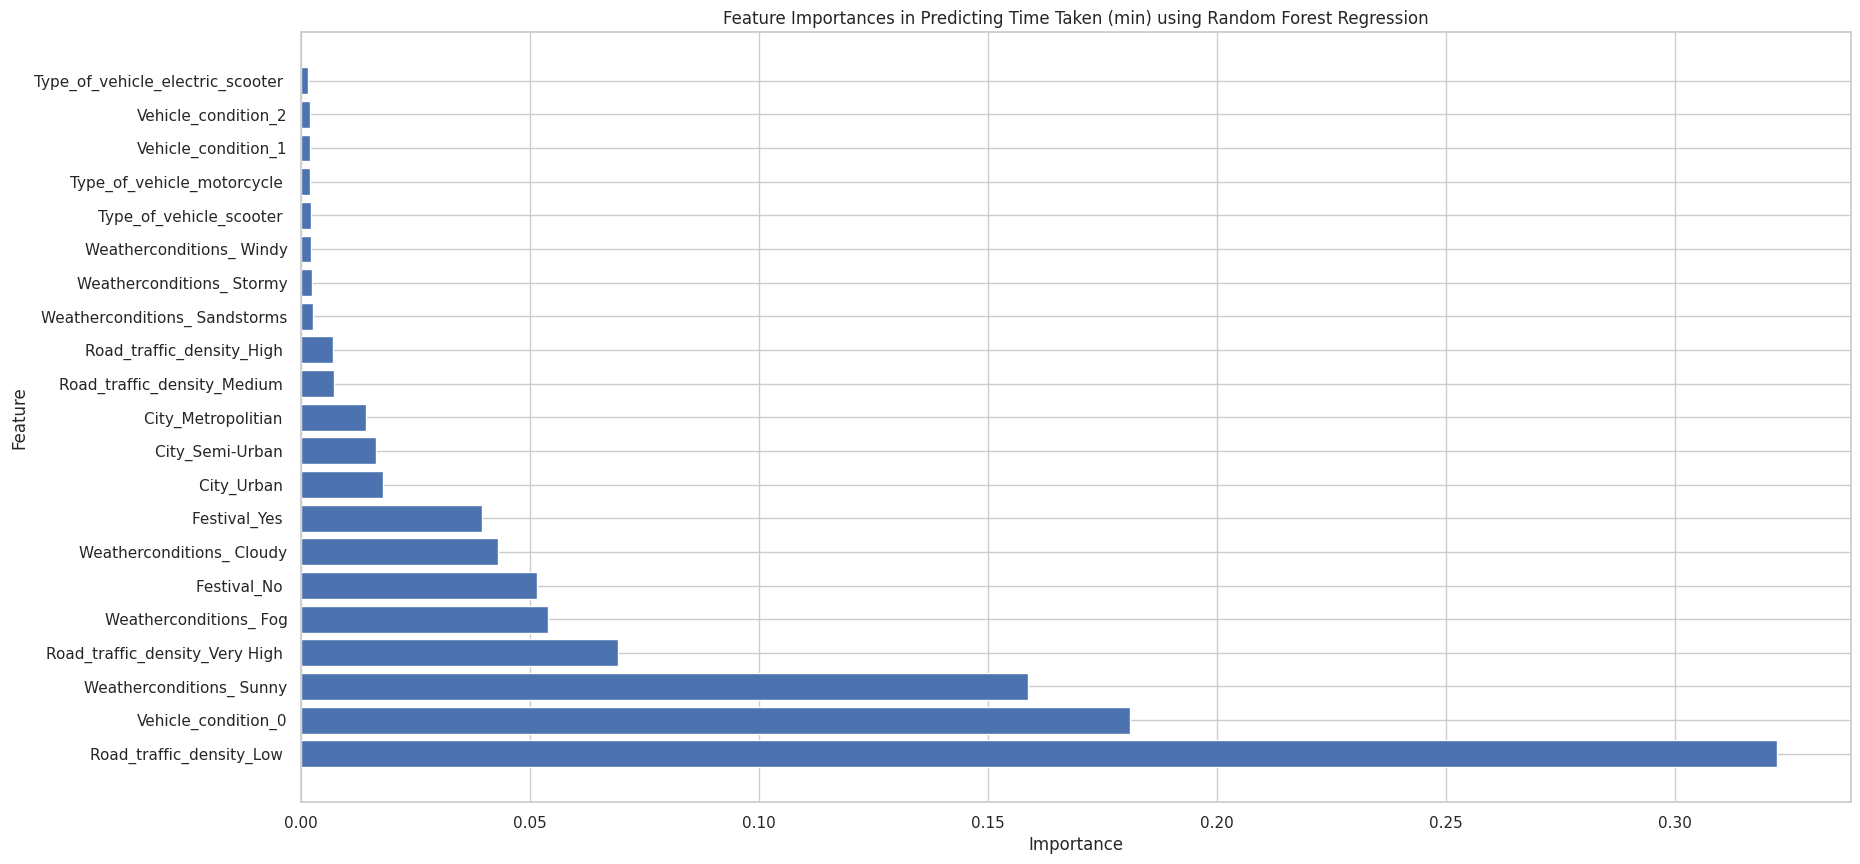

In [ ]:
# Assuming cleaned_Data contains your data
df = pd.DataFrame(cleaned_Data)

# Define the categorical columns
categorical_cols = ['Vehicle_condition', 'Weatherconditions', 'City', 'Festival', 'Type_of_vehicle', 'Road_traffic_density']

# Apply one-hot encoding only to the specified columns
df_encoded = pd.get_dummies(df[categorical_cols], columns=categorical_cols)

# Add the target variable 'Time_taken(min)' to df_encoded
df_encoded['Time_taken(min)'] = df['Time_taken(min)']

# Assuming 'Time_taken(min)' is the target variable
y = df_encoded['Time_taken(min)']
X = df_encoded.drop('Time_taken(min)', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features:")
print(feature_importance_df.to_string(index=False))

# Plot feature importances
plt.figure(figsize=(20, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Predicting Time Taken (min) using Random Forest Regression')
plt.show()

#### Non One-Hot Encoded Feature Importance:

Top Features:
             Feature  Importance
Road_traffic_density    0.418468
   Weatherconditions    0.249348
   Vehicle_condition    0.191253
            Festival    0.084526
                City    0.050424
     Type_of_vehicle    0.005981


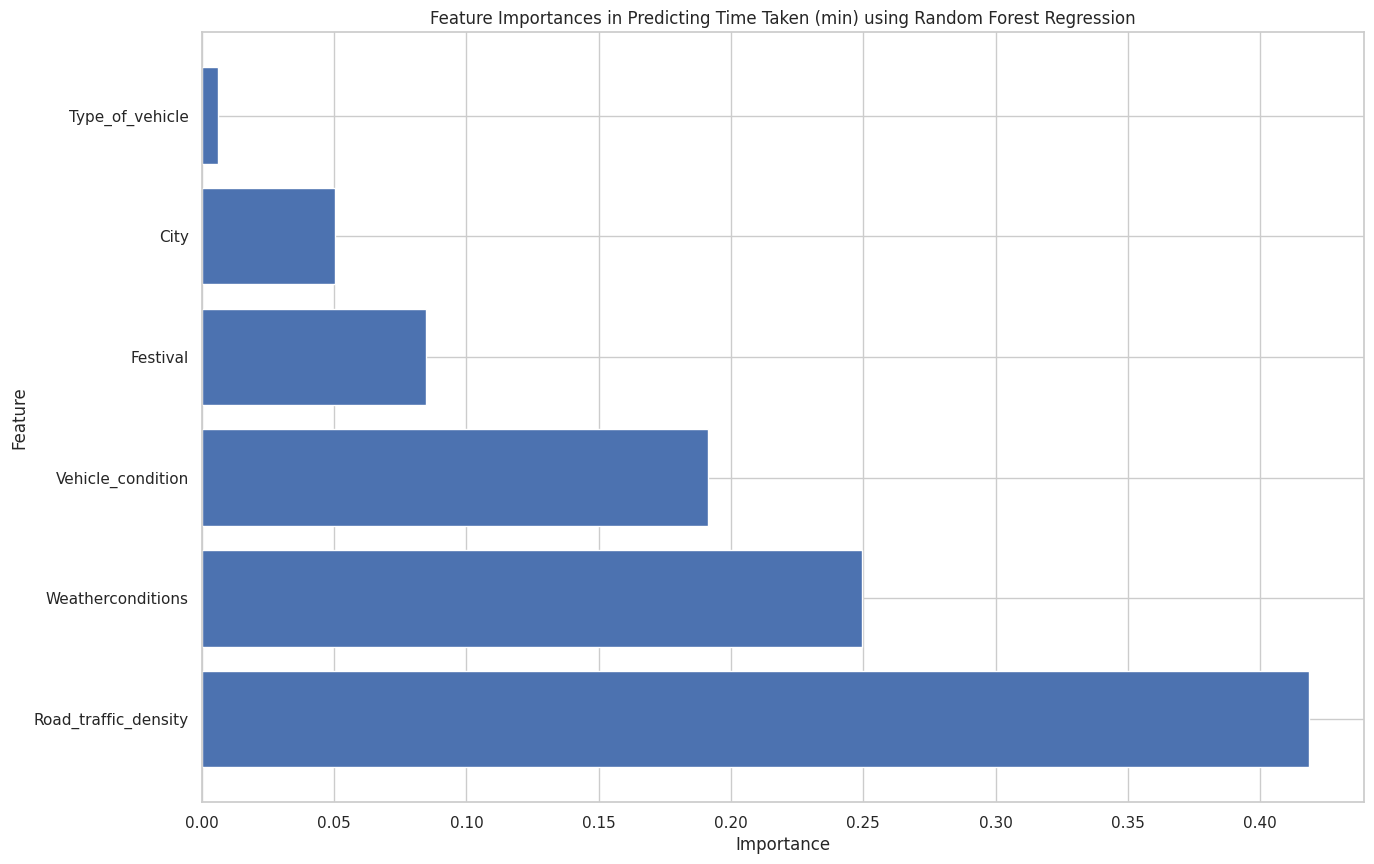

In [ ]:
# Assuming cleaned_Data contains your data
df = pd.DataFrame(cleaned_Data)


# Define the categorical columns
categorical_cols = ['Vehicle_condition', 'Weatherconditions', 'City', 'Festival', 'Type_of_vehicle', 'Road_traffic_density']

# Label encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Assuming 'Time_taken(min)' is the target variable
y = df['Time_taken(min)']
X = df[categorical_cols] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features:")
print(feature_importance_df.to_string(index=False))

# Plot feature importances
plt.figure(figsize=(15, 10))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Predicting Time Taken (min) using Random Forest Regression')
plt.show()


From the result above, the top 3 categorical variables to predict Time_taken(min) from both the one-hot encoded graph and the non one-hot encoded graph are: `vehicle_condition`, `weatherconditions` and `road_traffic_density`

## Machine Learning

Using the top 3 numerical and 3 categorical variable identified, we train some models and determine the most suitable model to predict time taken for delivery effectively and accurately. To do this we analyze the models based on the R-squared value and Mean Squared Error of the respective models. The higher the R-squared value and the lower Mean Squared Error indicates that the model is a better one.

### 1. Random Forest Regressor

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load cleaned data into a DataFrame (df)
df = pd.DataFrame(cleaned_Data)

# Define categorical and numerical columns
categorical_cols = ['Vehicle_condition', 'Weatherconditions', 'Road_traffic_density']
numerical_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance_between_restaurant_and_delivery_place(KM)']

# One-hot encode categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = ct.fit_transform(df[categorical_cols + numerical_cols])

# Create a DataFrame for the transformed features
X = pd.DataFrame(X, columns=ct.get_feature_names_out(categorical_cols + numerical_cols))

# Define the target variable
y = df['Time_taken(min)']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Get the indices of the train and test sets
train_indices = np.arange(X_train.shape[0])
test_indices = np.arange(X_test.shape[0]) + X_train.shape[0]

# Train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (Random Forest Regressor):', mse)

r_squared = r2_score(y_test, y_pred)
print('R-squared value (Random Forest Regressor):', r_squared)

# To use the same data splits for another model
X_train_new = X.iloc[train_indices]
X_test_new = X.iloc[test_indices]
y_train_new = y.iloc[train_indices]
y_test_new = y.iloc[test_indices]

Mean Squared Error (Random Forest Regressor): 18.12259166317741
R-squared value (Random Forest Regressor): 0.7928416041398341


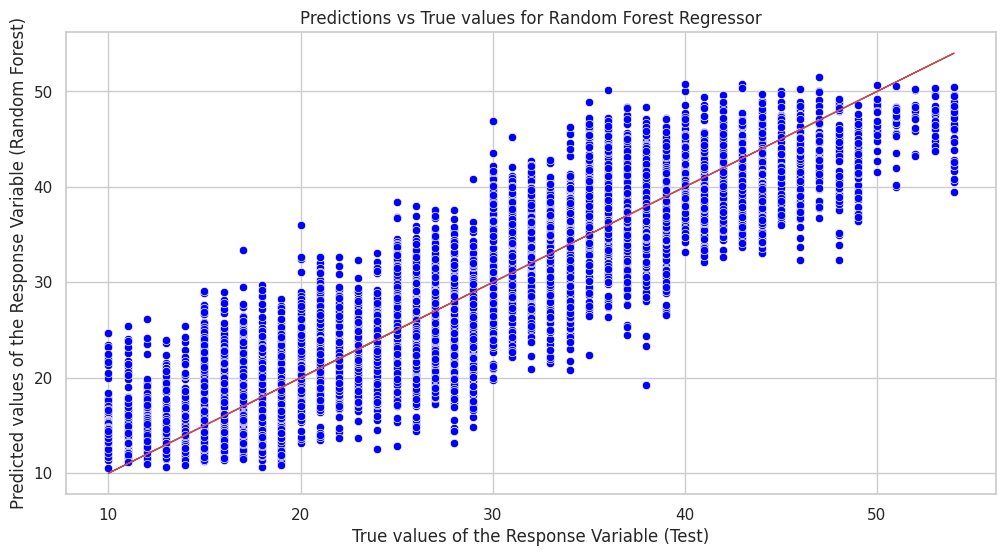

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the Predictions vs True values for the Random Forest model
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')  # Using 'blue' color for Random Forest predictions
plt.plot(y_test, y_test, 'r-', linewidth=1)  # Red line for perfect prediction
plt.xlabel("True values of the Response Variable (Test)")
plt.ylabel("Predicted values of the Response Variable (Random Forest)")
plt.title("Predictions vs True values for Random Forest Regressor")
plt.show()

Each blue dot represents a data point, where the x-coordinate is the true (actual) value from the test set, and the y-coordinate is the value predicted by the Random Forest Regressor model. There is a 45-degree line, which represents the "perfect prediction" line. If the model was making perfect predictions, all the blue dots would lie exactly on this red line. However, from this graph we can see that the blue dots are quite spread out and not cluster around the red line.

### 2. Extreme Gradient Boosting Regressor (XGBRegressor)

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import xgboost as xgb

# Load cleaned data into a DataFrame (df)
df = pd.DataFrame(cleaned_Data)

# Define categorical and numerical columns
categorical_cols = ['Vehicle_condition', 'Weatherconditions', 'Road_traffic_density']
numerical_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance_between_restaurant_and_delivery_place(KM)']

# One-hot encode categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = ct.fit_transform(df[categorical_cols + numerical_cols])

# Create a DataFrame for the transformed features
X = pd.DataFrame(X, columns=ct.get_feature_names_out(categorical_cols + numerical_cols))

# Define the target variable
y = df['Time_taken(min)']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Get the indices of the train and test sets
train_indices = np.arange(X_train.shape[0])
test_indices = np.arange(X_test.shape[0]) + X_train.shape[0]

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print('Mean Squared Error (XGBRegressor):', mse_xgb)

r_squared_xgb = r2_score(y_test, y_pred_xgb)
print('R-squared value (XGBRegressor):', r_squared_xgb)

Mean Squared Error (XGBRegressor): 15.424122836183413
R-squared value (XGBRegressor): 0.8236876599285639


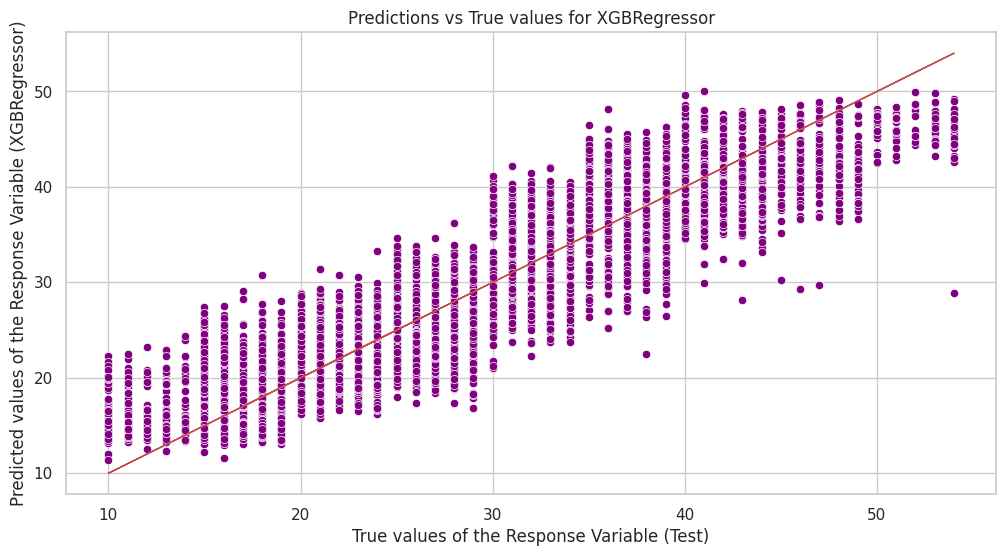

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the Predictions vs the True values for the XGBoost model
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, color='purple')  # Using 'purple' color for XGBoost model
plt.plot(y_test, y_test, 'r-', linewidth=1)  # Red line for perfect prediction
plt.xlabel("True values of the Response Variable (Test)")
plt.ylabel("Predicted values of the Response Variable (XGBRegressor)")
plt.title("Predictions vs True values for XGBRegressor")
plt.show()


Each purple dot represents a data point, where the x-coordinate is the true (actual) value from the test set, and the y-coordinate is the value predicted by the XGBRegressor. There is a 45-degree line, which represents the "perfect prediction" line. If the model was making perfect predictions, all the purple dots would lie exactly on this red line. It is obviously that the dots are more cluster towards the red line as compare to the first graph and this suggests that this model is performing better than random forest regressor.

### 3. Light Gradient Boosting Regressor(LightGBM)

In [ ]:
# Load cleaned data into a DataFrame (df)
df = pd.DataFrame(cleaned_Data)

# Define categorical and numerical columns
categorical_cols = ['Vehicle_condition', 'Weatherconditions', 'Road_traffic_density']
numerical_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance_between_restaurant_and_delivery_place(KM)']

# One-hot encode categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = ct.fit_transform(df[categorical_cols + numerical_cols])

# Create a DataFrame for the transformed features
X = pd.DataFrame(X, columns=ct.get_feature_names_out(categorical_cols + numerical_cols))

# Define the target variable
y = df['Time_taken(min)']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Get the indices of the train and test sets
train_indices = np.arange(X_train.shape[0])
test_indices = np.arange(X_test.shape[0]) + X_train.shape[0]

# Train the LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Calculate evaluation metrics for LightGBM
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print('Mean Squared Error (LightGBM):', mse_lgb)

r_squared_lgb = r2_score(y_test, y_pred_lgb)
print('R-squared value (LightGBM):', r_squared_lgb)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 31026, number of used features: 16
[LightGBM] [Info] Start training from score 26.518017
Mean Squared Error (LightGBM): 14.878623378418407
R-squared value (LightGBM): 0.829923235651588


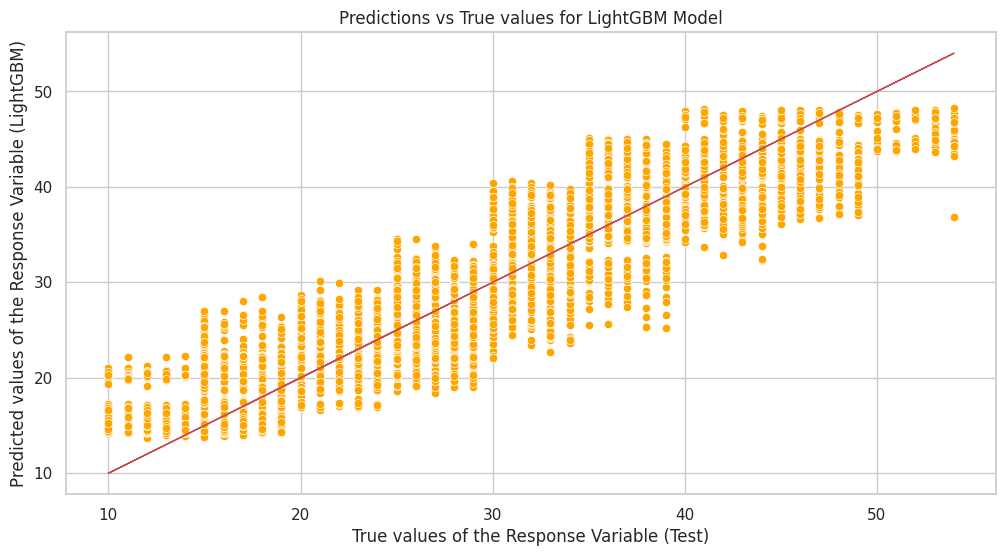

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the Predictions vs the True values for the LightGBM model
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_lgb, color='orange')  # Using 'orange' color for LightGBM model
plt.plot(y_test, y_test, 'r-', linewidth=1)  # Red line for perfect prediction
plt.xlabel("True values of the Response Variable (Test)")
plt.ylabel("Predicted values of the Response Variable (LightGBM)")
plt.title("Predictions vs True values for LightGBM Model")
plt.show()

Each orange dot represents a data point, where the x-coordinate is the true (actual) value from the test set, and the y-coordinate is the value predicted by the LightGBM. There is a 45-degree line, which represents the "perfect prediction" line. If the model was making perfect predictions, all the orange dots would lie exactly on this red line. As compare to the first and second graph, it is obvious that the points are more cluster towards the line in this graph and this suggests that this model is performing better than Random Forest Regressor and XGBRegressor.

### 4. Support Vector Regression (SVR) 

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load cleaned data into a DataFrame (df)
df = pd.DataFrame(cleaned_Data)

# Define categorical and numerical columns
categorical_cols = ['Vehicle_condition', 'Weatherconditions', 'Road_traffic_density']
numerical_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance_between_restaurant_and_delivery_place(KM)']

# One-hot encode categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = ct.fit_transform(df[categorical_cols + numerical_cols])

# Create a DataFrame for the transformed features
X = pd.DataFrame(X, columns=ct.get_feature_names_out(categorical_cols + numerical_cols))

# Define the target variable
y = df['Time_taken(min)']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Get the indices of the train and test sets
train_indices = np.arange(X_train.shape[0])
test_indices = np.arange(X_test.shape[0]) + X_train.shape[0]

# Train the Support Vector Regression model
svr_model = SVR(kernel='rbf', gamma='auto')
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr_model.predict(X_test)

# Calculate evaluation metrics for SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
print('Mean Squared Error (SVR):', mse_svr)

r_squared_svr = r2_score(y_test, y_pred_svr)
print('R-squared value (SVR):', r_squared_svr)

Mean Squared Error (SVR): 26.15028190861421
R-squared value (SVR): 0.7010774975145118


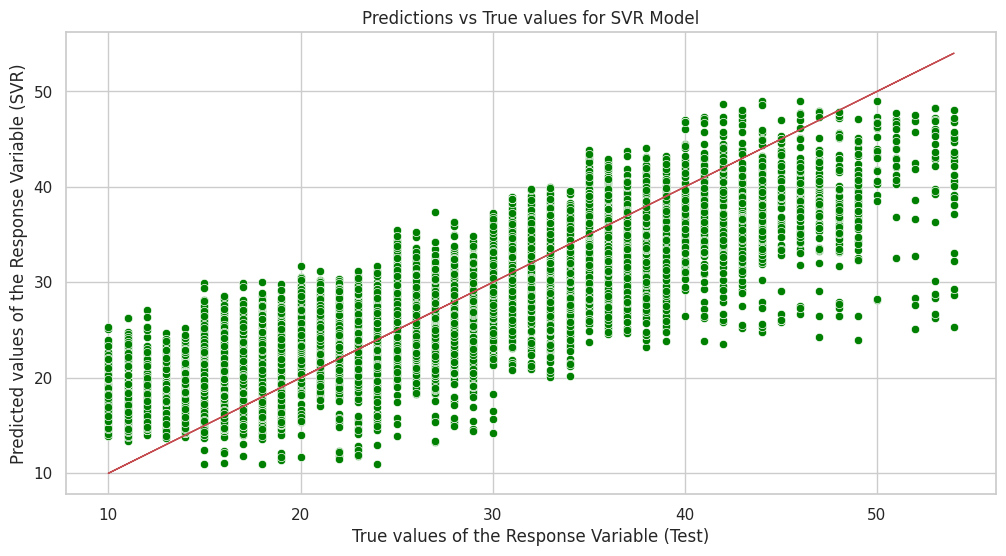

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the Predictions vs the True values for the SVR model
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_svr, color='green')  # Using 'green' color for SVR model
plt.plot(y_test, y_test, 'r-', linewidth=1)  # Red line for perfect prediction
plt.xlabel("True values of the Response Variable (Test)")
plt.ylabel("Predicted values of the Response Variable (SVR)")
plt.title("Predictions vs True values for SVR")
plt.show()

Each green dot represents a data point, where the x-coordinate is the true (actual) value from the test set, and the y-coordinate is the value predicted by the SVR. There is a 45-degree line, which represents the "perfect prediction" line. If the model was making perfect predictions, all the green dots would lie exactly on this red line. It is obvious that the green dots are more spread out compare to the previous graph and hence suggest that this model is performing not as good as the previous LightGBM.

### 5. Ensemble Model

We will try to combine all the 4 models we have used - Random Forest Regression, Extreme Gradient Boosting Regressor(XGBRegressor), Light Gradient Boosting Regressor(LightGBM) and Support Vector Regression(SVR) into one model which should be more accurate than the individual models. However, we found out that the ensemble model does not gives the highest R squared value nor lowest mean squared error with the following possible reason:

1.  Ensemble models work best when the individual models have diverse strengths and weaknesses. However, our models are too similar such as XGBRegressor and LightGBM. Hence, they may not provide enough complementary information to improve the overall performance.
2.  Our input has a high number of features. This may cause the ensemble model struggling in finding the optimal combination of features, leading to suboptimal performance.

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import xgboost as xgb
import lightgbm as lgb

# Load cleaned data into a DataFrame (df)
df = pd.DataFrame(cleaned_Data)

# Define categorical and numerical columns
categorical_cols = ['Vehicle_condition', 'Weatherconditions', 'Road_traffic_density']
numerical_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance_between_restaurant_and_delivery_place(KM)']

# One-hot encode categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = ct.fit_transform(df[categorical_cols + numerical_cols])

# Create a DataFrame for the transformed features
X = pd.DataFrame(X, columns=ct.get_feature_names_out(categorical_cols + numerical_cols))

# Define the target variable
y = df['Time_taken(min)']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the individual models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

svr_model = SVR(kernel='rbf', gamma='auto')
svr_model.fit(X_train, y_train)

# Predict on the test set using individual models
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)

# Create an ensemble model by averaging the predictions
y_pred_ensemble = (y_pred_rf + y_pred_xgb + y_pred_lgb + y_pred_svr) / 4

# Calculate evaluation metrics for the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
print('Mean Squared Error (Ensemble):', mse_ensemble)

r_squared_ensemble = r2_score(y_test, y_pred_ensemble)
print('R-squared value (Ensemble):', r_squared_ensemble)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 31026, number of used features: 16
[LightGBM] [Info] Start training from score 26.518017
Mean Squared Error (Ensemble): 15.811352140333579
R-squared value (Ensemble): 0.819261262039746


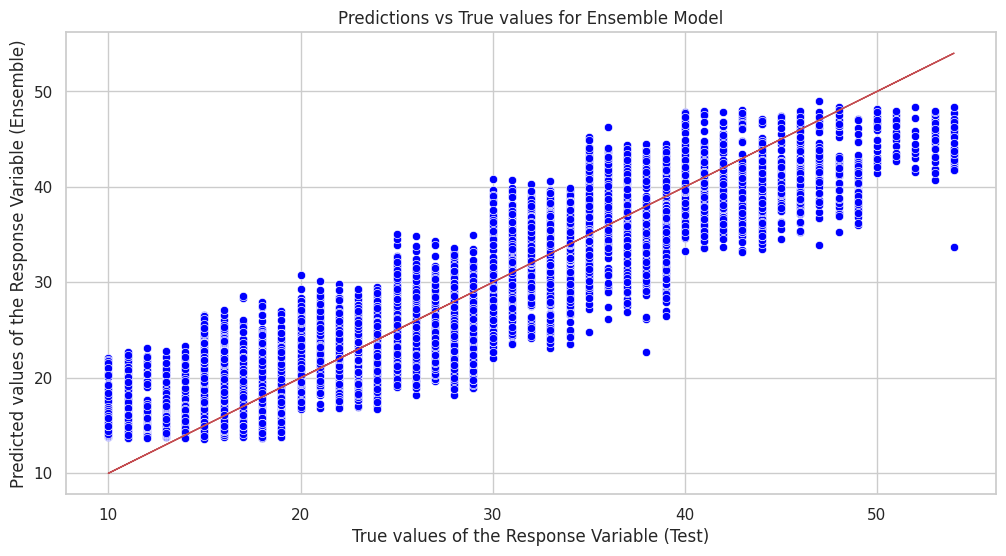

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the Predictions vs the True values for the second ensemble model
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_ensemble, color='blue')
plt.plot(y_test, y_test, 'r-', linewidth=1)
plt.xlabel("True values of the Response Variable (Test)")
plt.ylabel("Predicted values of the Response Variable (Ensemble)")
plt.title("Predictions vs True values for Ensemble Model")
plt.show()

Each blue dot represents a data point, where the x-coordinate is the true (actual) value from the test set, and the y-coordinate is the value predicted by the Ensemble Model. There is a 45-degree line, which represents the "perfect prediction" line. If the model was making perfect predictions, all the blue dots would lie exactly on this red line. The blue dots are more cluster towards the red line compare to the previous graph but it is not still not the best one when compare with LightGBM.

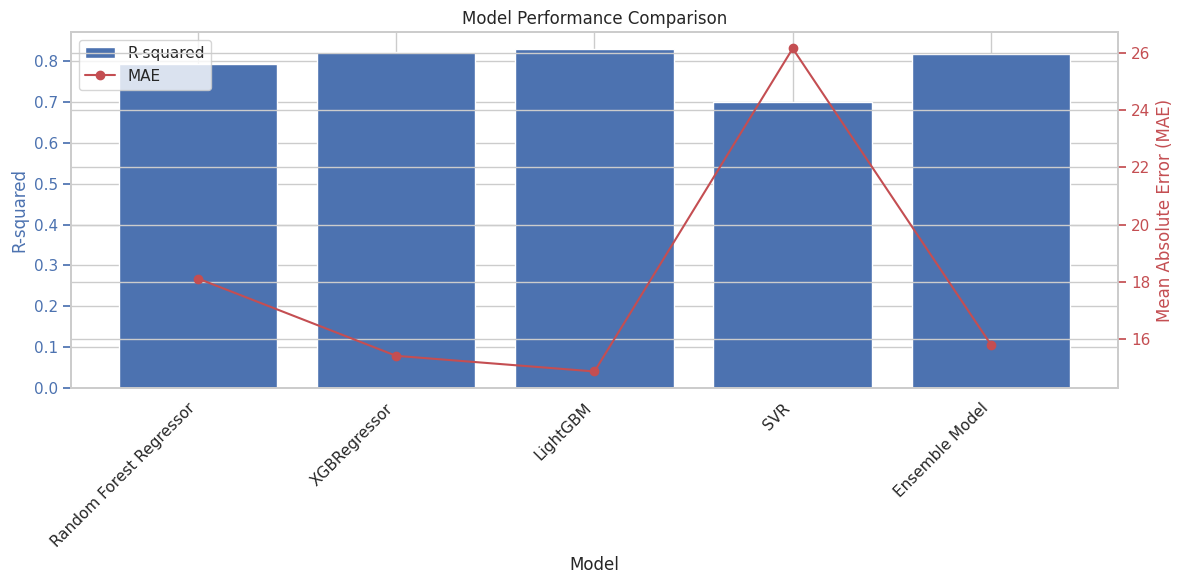

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# The data
models = ['Random Forest Regressor', 'XGBRegressor', 'LightGBM', 'SVR', 'Ensemble Model']
r2_values = [0.7928416041398341, 0.8236876599285639, 0.829923235651588, 0.7010774975145118, 0.819261262039746]
mae_values = [18.12259166317741, 15.424122836183413, 14.878623378418407, 26.15028190861421, 15.811352140333579]

# Create the figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the R-squared values
ax1.bar(np.arange(len(models)), r2_values, color='b', label='R-squared')
ax1.set_xlabel('Model')
ax1.set_ylabel('R-squared', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticks(np.arange(len(models)))
ax1.set_xticklabels(models, rotation=45, ha='right')

# Create a twin y-axis for the MAE values
ax2 = ax1.twinx()
ax2.plot(np.arange(len(models)), mae_values, color='r', marker='o', label='MAE')
ax2.set_ylabel('Mean Absolute Error (MAE)', color='r')
ax2.tick_params('y', colors='r')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()

| Models | R-squared value  | Mean-squared error (MSE) |
| --- | --- | --- |
| Random Forest Regressor |  0.7928416041398341 | 18.12259166317741 | 
| Extreme Gradient Boosting Regressor(XGBRegressor) |  0.8236876599285639 | 15.424122836183413 |
| Light Gradient Boosting Regressor(LightGBM) |  0.829923235651588 | 14.878623378418407 |
| Support Vector Regression(SVR) |  0.7010774975145118 | 26.15028190861421 |
| Ensemble Model |  0.819261262039746 | 15.811352140333579 |

As shown by the comparison graph plotted, **Light Gradient Boosting Regressor(LightGBM)** is the most optimal one to predict time taken for delivery with the highest R-squared value (0.8299) and lowest mean squared error (14.8786).

### Hyperparameter Tuning 

1. **Optuna** library is used to perform hyperparameter optimisation on the identified most optimal model - LightGBM. Optuna creates a study and optimizes the objective function by suggesting different combinations of hyperparameters and evaluating their performance.

2. Objective of Hyperparameter tuning is to minimize the root mean squared error (RMSE) and to check if it is possible to further improve the accuracy of LightGBM model. 

3. Hyperparameters Tuned:
`max_depth`: The maximum depth of the decision trees in the LightGBM model.
`learning_rate`: The learning rate of the LightGBM model, which controls the step size during the optimization process.
`num_leaves`: The maximum number of leaves in the decision trees.
`lambda_l1`: The L1 regularization parameter, which controls the sparsity of the model.
`lambda_l2`: The L2 regularization parameter, which controls the complexity of the model.
`bagging_freq`: The frequency of bagging (subsampling) the training data.
`bagging_fraction`: The fraction of the training data to be used in each bagging iteration.
`feature_fraction`: The fraction of features to be used in each split.
`verbosity`: The verbosity level of the LightGBM model, which controls the amount of output printed during training.

4. Early Stopping: The LightGBM model is trained with early stopping, which means the training will stop when the validation performance (in this case, RMSE) does not improve for a specified number of iterations. This helps to prevent overfitting and ensures the model generalizes well.

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def objective(trial):
    # hyperparameters
    max_depth = trial.suggest_int('max_depth', 8, 10)
    learning_rate = trial.suggest_uniform('learning_rate', 0.1, 0.3)
    num_leaves = trial.suggest_int('num_leaves', 100, 256)
    lambda_l1 = trial.suggest_loguniform('lambda_l1', 0.01, 1.0)
    lambda_l2 = trial.suggest_uniform('lambda_l2', 7.0, 8.0)
    bagging_freq = trial.suggest_int('bagging_freq', 2, 256)
    bagging_fraction = trial.suggest_uniform('bagging_fraction', 0.9, 1.0)
    feature_fraction = trial.suggest_uniform('feature_fraction', 0.4, 0.5)
    verbosity = trial.suggest_int('verbosity', 3, 6)

    # Create the LightGBM model with early stopping
    model = lgb.LGBMRegressor(
        max_depth=max_depth,
        learning_rate=learning_rate,
        num_leaves=num_leaves,
        lambda_l1=lambda_l1,
        lambda_l2=lambda_l2,
        bagging_freq=bagging_freq,
        bagging_fraction=bagging_fraction,
        feature_fraction=feature_fraction,
        verbosity=verbosity,
        objective='regression',
        boosting='gbdt',
        tree_method='hist',
        random_state=42,
        early_stopping_rounds=100,  # Early stopping
        eval_metric='rmse'  # Metric used for early stopping
    )

    # Fit the model and evaluate on the test set
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

    # Obtain the best iteration based on early stopping
    best_iteration = model.best_iteration_

    # Predict using the best iteration
    y_pred = model.predict(X_test, num_iteration=best_iteration)

    # Calculate MSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse


In [ ]:
# Create an Optuna study and optimize the hyperparameters
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[LightGBM] [Debug] Trained a tree with leaves = 112 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 112 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 83 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 112 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 30 and depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 112 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 112 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 112 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 112 and depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 112 and depth = 8
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 29 and depth = 7
[LightGBM] [Warning] No further splits with positive

In [ ]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_bagging_fraction,params_bagging_freq,params_feature_fraction,params_lambda_l1,params_lambda_l2,params_learning_rate,params_max_depth,params_num_leaves,params_verbosity,state
0,0,4.026002,2024-04-17 11:01:50.799970,2024-04-17 11:01:51.472095,0 days 00:00:00.672125,0.977873,159,0.434701,0.012029,7.841331,0.196704,8,177,3,COMPLETE
1,1,4.062857,2024-04-17 11:01:51.473971,2024-04-17 11:01:52.118645,0 days 00:00:00.644674,0.929478,171,0.434217,0.914877,7.267216,0.125832,9,140,3,COMPLETE
2,2,4.027814,2024-04-17 11:01:52.119652,2024-04-17 11:01:52.769090,0 days 00:00:00.649438,0.931531,128,0.463537,0.018328,7.663621,0.244934,8,180,5,COMPLETE
3,3,4.060925,2024-04-17 11:01:52.771178,2024-04-17 11:01:53.484625,0 days 00:00:00.713447,0.913913,204,0.451003,0.029485,7.056788,0.223646,10,210,4,COMPLETE
4,4,4.120887,2024-04-17 11:01:53.485887,2024-04-17 11:01:54.197819,0 days 00:00:00.711932,0.919985,24,0.401348,0.018527,7.227961,0.271109,9,255,3,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,3.940789,2024-04-17 11:03:00.118869,2024-04-17 11:03:00.849879,0 days 00:00:00.731010,0.989150,33,0.478316,0.021539,7.710216,0.190371,8,112,4,COMPLETE
96,96,3.956724,2024-04-17 11:03:00.851245,2024-04-17 11:03:01.518476,0 days 00:00:00.667231,0.978952,33,0.479260,0.020952,7.760410,0.203064,8,112,4,COMPLETE
97,97,4.020928,2024-04-17 11:03:01.519926,2024-04-17 11:03:02.205436,0 days 00:00:00.685510,0.997464,13,0.468232,0.025002,7.800505,0.192850,8,107,4,COMPLETE
98,98,3.951881,2024-04-17 11:03:02.206568,2024-04-17 11:03:03.648293,0 days 00:00:01.441725,0.992243,22,0.484315,0.014150,7.706704,0.189573,8,116,3,COMPLETE


In [ ]:
# Print the best hyperparameters and the best score
print("Best params:")
for key, value in study.best_params.items():
    print(f"\t{key}: {value}")
print('Best RMSE:', study.best_value)

Best params:
	max_depth: 8
	learning_rate: 0.19130271786802763
	num_leaves: 119
	lambda_l1: 0.02051465721003259
	lambda_l2: 7.665348544270411
	bagging_freq: 59
	bagging_fraction: 0.9967541119155008
	feature_fraction: 0.47221134005206716
	verbosity: 4
Best RMSE: 3.940055036746596


In [ ]:
# Train the final model with the best hyperparameters
final_model = lgb.LGBMRegressor(**study.best_params, random_state=42)
final_model.fit(X_train, y_train)

[LightGBM] [Warning] bagging_freq is set=59, subsample_freq=0 will be ignored. Current value: bagging_freq=59
[LightGBM] [Warning] feature_fraction is set=0.47221134005206716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47221134005206716
[LightGBM] [Warning] lambda_l2 is set=7.665348544270411, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.665348544270411
[LightGBM] [Warning] lambda_l1 is set=0.02051465721003259, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02051465721003259
[LightGBM] [Warning] bagging_fraction is set=0.9967541119155008, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9967541119155008
[LightGBM] [Warning] bagging_freq is set=59, subsample_freq=0 will be ignored. Current value: bagging_freq=59
[LightGBM] [Warning] feature_fraction is set=0.47221134005206716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47221134005206716
[LightGBM] [Warning] lambda_l2 is set=7.66534854427041

LGBMRegressor(bagging_fraction=0.9967541119155008, bagging_freq=59,
              feature_fraction=0.47221134005206716,
              lambda_l1=0.02051465721003259, lambda_l2=7.665348544270411,
              learning_rate=0.19130271786802763, max_depth=8, num_leaves=119,
              random_state=42, verbosity=4)

In [ ]:
# Evaluate the final model on the test set
y_pred_final = final_model.predict(X_test)
mse_final = mean_squared_error(y_test, y_pred_final)
r_squared_final = r2_score(y_test, y_pred_final)

print('Mean Squared Error (Final Model):', mse_final)
print('R-squared value (Final Model):', r_squared_final)

[LightGBM] [Warning] bagging_freq is set=59, subsample_freq=0 will be ignored. Current value: bagging_freq=59
[LightGBM] [Warning] feature_fraction is set=0.47221134005206716, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47221134005206716
[LightGBM] [Warning] lambda_l2 is set=7.665348544270411, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.665348544270411
[LightGBM] [Warning] lambda_l1 is set=0.02051465721003259, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02051465721003259
[LightGBM] [Warning] bagging_fraction is set=0.9967541119155008, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9967541119155008
Mean Squared Error (Final Model): 15.531153057549595
R-squared value (Final Model): 0.8224642030754347


In [ ]:
# shows the scores from all trials
optuna.visualization.plot_optimization_history(study)

Objective value in graph above refers to the value that the optimization algorithm is attempting to minimize or maximize.

1. The objective value (blue dots) shows significant fluctuations throughout the optimization process, indicating that the algorithm is exploring different regions of the search space.
2. The best value (red line) is generally decreasing over the course of the optimization, suggesting that the algorithm is gradually finding better solutions.
3. There is a sharp drop in both the objective value and the best value around trial 20, indicating a major improvement in the solution quality at that point.
4. After the initial sharp drop, the best value continues to decrease gradually, but with smaller improvements, suggesting that the algorithm is refining the solution in a more stable manner.
5. Towards the end of the optimization process, the objective value and the best value converge to a similar level, indicating that the algorithm has likely found a near-optimal solution.
6. The final best value achieved appears to be around **3.95(rmse)**, which could represent the minimum or target value for the optimization problem being solved.
Overall, the plot demonstrates the typical behavior of an optimization algorithm, where it starts by exploring the search space broadly, then converges towards a near-optimal solution through gradual refinements.

In [ ]:
# Visualize parameter importances.
optuna.visualization.plot_param_importances(study)

From the above, `feature fraction` is the most important hyperparameter followed by `learning_rate` parameter. 
| Models | R-squared value  | Mean-squared error (MSE) |
| --- | --- | --- |
| LightGBM (Before Hyperparameter tuning) |  0.829923235651588 | 14.878623378418407 |
| LightGBM (After Hyperparameter tuning) | 0.8218842199555421 | 15.581891031309757 |

#### Observations
1. It is interesting to note that the MSE of tuned LightGBM has **increased** while the R-squared value has experienced a slight decrease, implying a **decrease** in performance. 
2. Some of the possible factors behind the decrease:
a) Overfitting Prevention: During hyperparameter tuning, regularization parameters such as lambda_l1 and lambda_l2 might have been introduced to prevent overfitting. While these regularization techniques help to generalize the model better to unseen data, they could also slightly reduce the model's performance on the training set.

b) Optimization Bias: The hyperparameter optimization process aims to find the optimal set of hyperparameters that minimize the validation error (RMSE or MSE). However, this optimization is based on a finite number of trials and might not find the true optimal hyperparameters. The selected hyperparameters might not perfectly generalize to the test set, leading to a slight decrease in performance.

c) Randomness: The hyperparameter optimization process involves some level of randomness, such as the initialization of parameters and the search process itself. Due to this randomness, the performance of the model after tuning might vary slightly between different runs of the optimization process.

d) Complexity of the Dataset: The dataset might be inherently complex, making it challenging to find the optimal set of hyperparameters that can significantly improve the model's performance. In such cases, the gains from hyperparameter tuning might be marginal.

e) Evaluation Metric: The choice of evaluation metric (R-squared value and MSE) could also influence the observed results. While hyperparameter tuning aims to minimize MSE, it might not always lead to improvements in R-squared value, especially if the model becomes more conservative or biased towards the mean predictions.

#### Based on the metrics above, the untuned LightGBM model outperforms the tuned LightGBM model. While hyperparameter tuning aims to enhance model performance by optimizing the model's hyperparameters, in this specific case, the tuning process did not yield significant improvements.

Although we know that LightGBM is the most optimal models among all those 5 to find time taken for delivery, but we try to tune the hyperparameter to try if we can get better performance of this model. However, through our attempt we find out that our original model is the best one.

## K-fold Cross-validation

So far, the relative accuracies (from highest to lowest) of our models are:

1. LightGBM = 0.8299
2. Ensemble Model = 0.8193
3. XGBRegressor Model = 0.8237
4. Random Forest Regressor=  0.7928
5. Support Vector Regression = 0.7011

However, the reported model accuracies may not represent the actual or true accuracy of the models due to several reasons such as overfitting of data and data split is not representative of the overall data distribution. Hence by performing K-fold cross-validation, we can address these issues and obtain a more reliable estimate of the model's true performance using the following ways:

1. By training and evaluating the model on different subsets of the data to reduce the risk of overfitting to the training data.
2. The average of the K evaluation scores provides a more robust estimate of the model's true performance on unseen data.
3. By using multiple train-test splits, the impact of the specific data split on the model's performance is reduced.

We have determined that 5 folds give the highest accuracy.

In [ ]:
!pip install xgboost==2.0.3

  Using cached xgboost-2.0.3-py3-none-manylinux2014_x86_64.whl (297.1 MB)
  Using cached numpy-1.24.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached scipy-1.10.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import xgboost as xgb
import lightgbm as lgb

# Load cleaned data into a DataFrame (df)
df = pd.DataFrame(cleaned_Data)

# Define categorical and numerical columns
categorical_cols = ['Vehicle_condition', 'Weatherconditions', 'Road_traffic_density']
numerical_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance_between_restaurant_and_delivery_place(KM)']

# One-hot encode categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = ct.fit_transform(df[categorical_cols + numerical_cols])
X = pd.DataFrame(X, columns=ct.get_feature_names_out(categorical_cols + numerical_cols))

# Define the target variable
y = df['Time_taken(min)']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Cross-validation for Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_mse = -np.mean(rf_scores)
rf_r2 = cross_val_score(rf_model, X, y, cv=5, scoring='r2').mean()
print('Random Forest Regressor - Mean Squared Error (Cross-Validation):', rf_mse)
print('Random Forest Regressor - R-squared value (Cross-Validation):', rf_r2)

# Cross-validation for XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
xgb_mse = -np.mean(xgb_scores)
xgb_r2 = cross_val_score(xgb_model, X, y, cv=5, scoring='r2').mean()
print('XGBoost - Mean Squared Error (Cross-Validation):', xgb_mse)
print('XGBoost - R-squared value (Cross-Validation):', xgb_r2)

# Cross-validation for LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
lgb_mse = -np.mean(lgb_scores)
lgb_r2 = cross_val_score(lgb_model, X, y, cv=5, scoring='r2').mean()
print('LightGBM - Mean Squared Error (Cross-Validation):', lgb_mse)
print('LightGBM - R-squared value (Cross-Validation):', lgb_r2)

# Cross-validation for Support Vector Regressor
svr_model = SVR(kernel='rbf', gamma='auto')
svr_scores = cross_val_score(svr_model, X, y, cv=5, scoring='neg_mean_squared_error')
svr_mse = -np.mean(svr_scores)
svr_r2 = cross_val_score(svr_model, X, y, cv=5, scoring='r2').mean()
print('Support Vector Regressor - Mean Squared Error (Cross-Validation):', svr_mse)
print('Support Vector Regressor - R-squared value (Cross-Validation):', svr_r2)

# Train the individual models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Predict on the test set using individual models
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)

# Create an ensemble model by averaging the predictions
y_pred_ensemble = (y_pred_rf + y_pred_xgb + y_pred_lgb + y_pred_svr) / 4

# Calculate evaluation metrics for the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r_squared_ensemble = r2_score(y_test, y_pred_ensemble)
print('Mean Squared Error (Ensemble):', mse_ensemble)
print('R-squared value (Ensemble):', r_squared_ensemble)

Random Forest Regressor - Mean Squared Error (Cross-Validation): 18.109076126294344
Random Forest Regressor - R-squared value (Cross-Validation): 0.7920703899938115
XGBoost - Mean Squared Error (Cross-Validation): 15.357877009115688
XGBoost - R-squared value (Cross-Validation): 0.8236858059566783
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 33094, number of used features: 16
[LightGBM] [Info] Start training from score 26.515411
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points

### K-Fold Accuracies

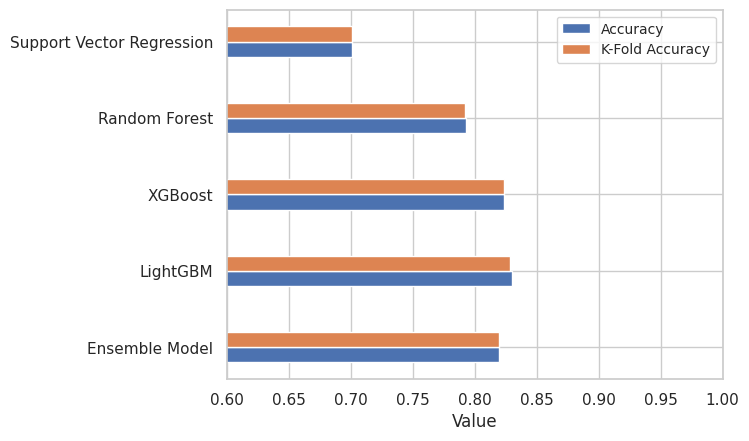

In [ ]:
fig, ax = plt.subplots()

bar_width = 0.2  # Reduce the bar width to fit all models

bar_pos1 = [0, 1, 2, 3, 4]  # Adjust positions for 5 models
bar_pos2 = [x + bar_width for x in bar_pos1]

# Sample data for k_fold_df (replace with actual values)
k_fold_df = pd.DataFrame({
    'Model': ['Ensemble Model', 'LightGBM', 'XGBoost', 'Random Forest', 'Support Vector Regression'],  # Added comma here
    'Accuracy': [0.8193, 0.8299, 0.8237, 0.7928, 0.7011],  # Sample accuracy values
    'K-Fold Accuracy': [0.8193, 0.8284, 0.8237, 0.7921, 0.7013]  # Sample k-fold accuracy values
})

ax.barh(bar_pos1, k_fold_df['Accuracy'], height=bar_width, label='Accuracy')
ax.barh(bar_pos2, k_fold_df['K-Fold Accuracy'], height=bar_width, label='K-Fold Accuracy')

ax.set_yticks([x + bar_width / 2 for x in bar_pos1])
ax.set_yticklabels(k_fold_df['Model'])

ax.set_xlabel('Value')
ax.set_xlim([0.6, 1])  # Adjust xlim based on your data

ax.legend(fontsize=10)

plt.show()

From the bar graph of comparing the accuracy of our models and K-fold cross validation, we can see that the models that we get are near to the optimal models and this confirm our result that **Light Gradient Boosting Regressor(LightGBM)** is the best models to predict time taken for delivery.

## Further analysis based on the LightGBM

### Extracting top factor by Feature Importance

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 41368, number of used features: 16
[LightGBM] [Info] Start training from score 26.553350
Feature Importance:
                                           Feature  Importance
                               Delivery_person_Age         556
Distance_between_restaurant_and_delivery_place(KM)         484
                           Delivery_person_Ratings         471
                               Vehicle_condition_0         280
                               Weatherconditions_4         208
                               Weatherconditions_0         198
                               Weatherconditions_1         191
                            Road_traffic_density_1         156
        

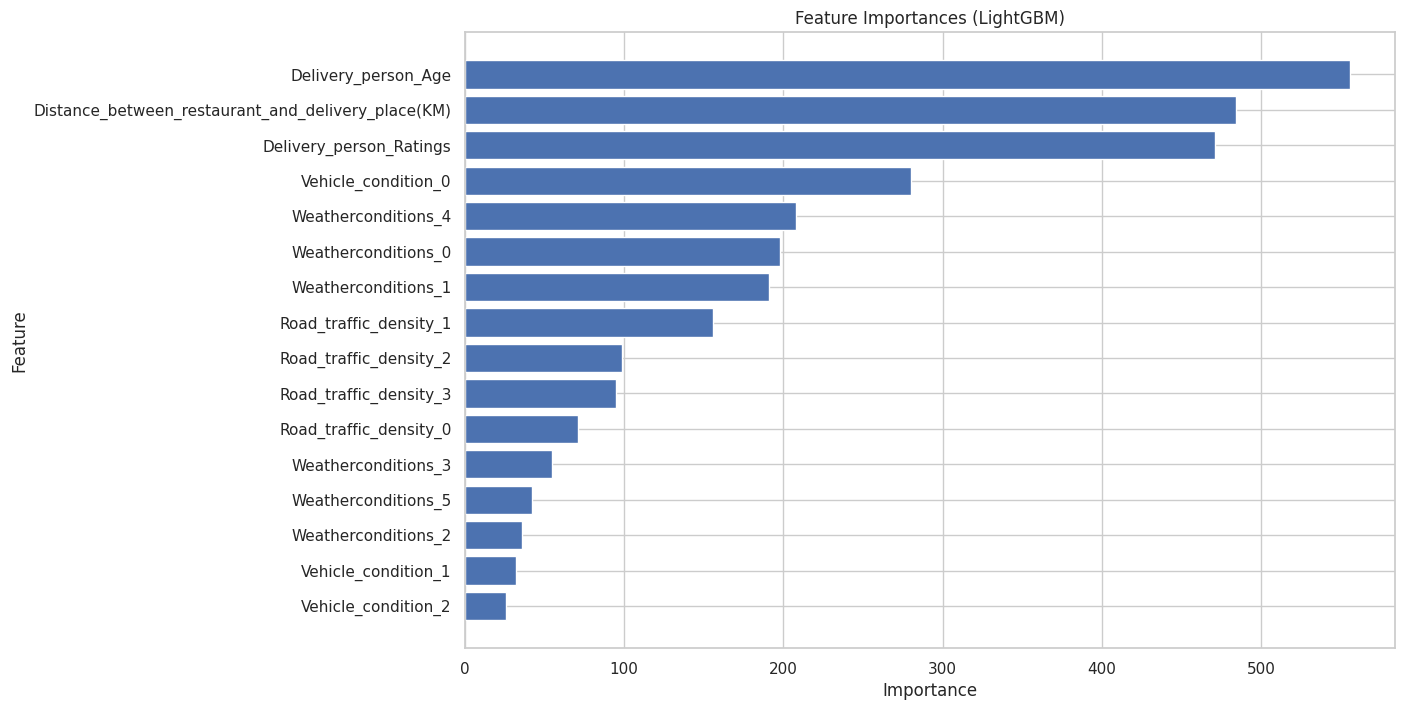

In [ ]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define categorical and numerical columns
categorical_cols = ['Vehicle_condition', 'Weatherconditions', 'Road_traffic_density']
numerical_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance_between_restaurant_and_delivery_place(KM)']

# One-hot encode categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_encoded = ct.fit_transform(df[categorical_cols + numerical_cols])

# Get feature names after one-hot encoding
feature_names = list(ct.named_transformers_['encoder'].get_feature_names_out(input_features=categorical_cols)) + numerical_cols

# Train the LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_encoded, y)

# Get feature importances
feature_importance = lgb_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort feature importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importance:")
print(feature_importance_df.to_string(index=False))

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'][::-1], feature_importance_df['Importance'][::-1])  # Reversed order
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (LightGBM)')
plt.show()


### Top factor: `Delivery_person_Age`

The feature importance in LightGBM is determined by the **"gain"** metric, which measures the improvement in the model's performance (e.g., reduction in mean squared error) when a particular feature is used to split the data in the tree-based algorithm. The features that contribute the most to the model's performance will have higher importance scores.

## Conclusion

The R-squared value show that **LightGB Model** has the highest accuracy in predicting time taken for delivery. Hence, this suggests that this model is the most suitable model to predict time taken for delivery accurately and precisely. 

### Future Improvement

1. Incorporate deep neural networks machine learning techniques.
2. Ensure that the model is robust and scalable to handle large volumes of data and real-time prediction requests, especially if it's deployed in a production environment.
3. Integrate additionals features that could potentially impact delivery time to allow better prediction of time taken(more accurate).
4. Incorporate a feedback mechanism where the actual delivery times are collected and used to update the model periodically, ensuring it remains accurate and reflective of real-world conditions.

# <center>**SwiftDeliver**</center>


Feel free to try out our SwiftDeliver below! Simply input the required variables and get precise and accurate prediction for time taken for delivery to reach your destination!

In [ ]:
!pip install art==6.1
from art import text2art
from termcolor import colored

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.8/599.8 KB 70.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from art import text2art
from termcolor import colored

# Generate ASCII art text
ascii_art = text2art("SwiftDeliver")

# Print colored ASCII art text
print(colored(ascii_art, 'red', attrs=['bold']))


 ____             _   __  _    ____         _  _                    
/ ___| __      __(_) / _|| |_ |  _ \   ___ | |(_)__   __  ___  _ __ 
\___ \ \ \ /\ / /| || |_ | __|| | | | / _ \| || |\ \ / / / _ \| '__|
 ___) | \ V  V / | ||  _|| |_ | |_| ||  __/| || | \ V / |  __/| |   
|____/   \_/\_/  |_||_|   \__||____/  \___||_||_|  \_/   \___||_|   
                                                                    



### Description:

The SwiftDeliver Model is designed to enhance customer experience by providing accurate delivery time predictions. This powerful model use LightGBM to ensure precision and reliability.One of its key features is the ability to constantly update its dataset with new user inputs. This ongoing refinement process improves the model's accuracy over time, ensuring that customers receive their orders exactly when they want them. SwiftDeliver is committed to delivering exceptional service through advanced predictive analytics.

### Get User Input and Predict Time Taken for Delivery Based on the Best Model (LightGBM Model)

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import lightgbm as lgb

# Load cleaned data into a DataFrame (df)
df = pd.DataFrame(cleaned_Data)

# Define categorical and numerical columns
categorical_cols = ['Vehicle_condition', 'Weatherconditions', 'Road_traffic_density']
numerical_cols = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Distance_between_restaurant_and_delivery_place(KM)']

# Get user input for categorical variables
user_categorical_input = []
for col in categorical_cols:
    if col == 'Vehicle_condition':
        val = int(input(f"Enter {col} (0-2): "))  # Convert to int for Vehicle_condition
        if val < 0 or val > 2:
            raise ValueError(f"{col} should be between 0 and 2.")
    elif col == 'Weatherconditions':
        val = input(f"Enter {col} (Sunny, Stormy, Sandstorms, Cloudy, Fog, Windy): ")
        if val not in ['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy']:
            raise ValueError(f"Invalid category entered for {col}: {val}")
    elif col == 'Road_traffic_density':
        val = input(f"Enter {col} (High, Very High, Low, Medium): ")
        if val not in ['High', 'Very High', 'Low', 'Medium']:
            raise ValueError(f"Invalid category entered for {col}: {val}")
    user_categorical_input.append(val)

# Get user input for numerical variables
user_numerical_input = []
for col in numerical_cols:
    val = float(input(f"Enter {col}: "))  # Convert to float if input is numerical
    user_numerical_input.append(val)

# Combine user input into a DataFrame
user_data = pd.DataFrame([user_categorical_input + user_numerical_input], columns=categorical_cols + numerical_cols)

# Corrected part: One-hot encode categorical columns using categories obtained from the training set
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols)], remainder='passthrough')
ct.fit(df[categorical_cols + numerical_cols])  # Fit the ColumnTransformer to the data
user_data_transformed = ct.transform(user_data)  # Transform the user input

# Train the LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)
X = ct.transform(df[categorical_cols + numerical_cols])
y = df['Time_taken(min)']
lgb_model.fit(X, y)

# Predict on the user data using the LightGBM model
user_prediction = lgb_model.predict(user_data_transformed)

print("Predicted Time_taken(min) using LightGBM:", user_prediction)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 41368, number of used features: 16
[LightGBM] [Info] Start training from score 26.553350
Predicted Time_taken(min) using LightGBM: [28.07624724]


### Sample Input and Result Achieved
Input(s):
Delivery_person_Age = 37
Delivery_person_Ratings 4.9
Distance_between_restaurant_and_delivery_place(KM) = 3KM
Vehicle_condition = 2
Road_traffic_density = High
Weatherconditions = Sunny

Output:
Predicted Time_taken(min) = 28 min

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=44a00546-0efa-4f5e-a5a5-ac13bae81f5d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>